# Part I - Loan Data From Prosper: An Exploratory Analysis
## by Ikenna Chukwudum

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Prosper Marketplace, Inc. is a San Francisco, California-based company in the peer-to-peer lending industry. Prosper Funding LLC, one of its subsidiaries, operates Prosper.com, a website where individuals can either invest in personal loans or request to borrow money.
  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> I'll start by importing the dataset "prosperLoanData.csv" to the data frame prosper_df


In [2]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\IKENNA\\UDACITY_FINAL_PROJECT': ['.ipynb_checkpoints', 'Part 1_Exploration_Visualizations_Prosper_Analysis.html', 'Part 1_Exploration_Visualizations_Prosper_Analysis.ipynb', 'Part_2_Explanatory_Visualisations_Prosper_Analysis.html', 'Part_2_Explanatory_Visualisations_Prosper_Analysis.ipynb', 'Part_2_Explanatory_Visualisations_Prosper_Analysis.slides.html', 'prosperLoanData.csv', 'README.md', 'udacity 3rd project - ikenna chukwudum.zip']


In [3]:
prosper_df = pd.read_csv("prosperLoanData.csv")
prosper_df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


> I'll explore the data frame to determine the relevant variables for our exploration

In [4]:
prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
prosper_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
prosper_df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

### What is the structure of your dataset?

> The dataset has 113,937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

> The interest rate, loan amount, employment status, occupation, loan status, monthly repayment amount

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Term, LoanStatus, BorrowerRate, EstimatedReturn, Occupation, EmploymentStatus, CurrentDeliquencies, AmountDeliquent, DeliquenciesLast7Years, IncomeRange, StatedMonthlyIncome, LoanOriginalAmount, LoanOriginationDate

## Univariate Exploration








> I would like to start by exploring the occupation types and the relationship with other variables. Did occupation type play a part in the loan amount availed by Prosper Funding LLC and to what extent?

#### Occupation

In [7]:
prosper_df['Occupation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113937 entries, 0 to 113936
Series name: Occupation
Non-Null Count   Dtype 
--------------   ----- 
110349 non-null  object
dtypes: object(1)
memory usage: 890.3+ KB


> Appearance of null values in Occupation column implies we have to wrangle and fill missing information 

In [8]:
prosper_df['Occupation'].isna().sum()

3588

In [9]:
prosper_df['Occupation'].describe()

count     110349
unique        67
top        Other
freq       28617
Name: Occupation, dtype: object

In [10]:
prosper_df['Occupation'].fillna('Unknown', inplace=True)

> Further wrangling is required as there are a lot of similar occupation types. In order to reduce noise, occupation types will be manually grouped together

In [12]:
replacers = {'Engineer - Mechanical':'Engineer','Engineer - Electrical':'Engineer','Engineer - Chemical'\
             :'Engineer','Biologist':'Scientist', 'Chemist':'Scientist', 'Student - College Graduate Student'\
             :'Student', 'Student - College Senior':'Student', 'Student - College Junior':'Student','Student - College Sophomore'\
             :'Student','Student - College Freshman':'Student', 'Student - Community College':'Student', 'Student - Technical School'\
             :'Student', 'Tradesman - Mechanic'\
             :'Tradesman', 'Tradesman - Electrician':'Tradesman', 'Tradesman - Carpenter':'Tradesman', 'Tradesman - Plumber'\
             :'Tradesman', 'Clergy':'Religious', '':'Religious', 'Nurse (RN)':'Nurse', 'Nurse (LPN)':'Nurse', "Nurse's Aide"\
             :'Nurse', "Teacher's Aide":'Teacher','Food Service Management':'Food Service','Military Enlisted':'Military', 'Military Officer'\
             :'Military', 'Sales - Commission':'Sales', 'Sales - Retail':'Sales', 'Administrative Assistant':'Clerical'} 
prosper_df['Occupation'] = prosper_df['Occupation'].replace(replacers)
prosper_df['Occupation'].value_counts().index

Index(['Other', 'Professional', 'Clerical', 'Sales', 'Computer Programmer',
       'Executive', 'Teacher', 'Analyst', 'Unknown', 'Nurse', 'Accountant/CPA',
       'Engineer', 'Skilled Labor', 'Retail Management', 'Food Service',
       'Construction', 'Truck Driver', 'Tradesman', 'Military', 'Laborer',
       'Police Officer/Correction Officer', 'Civil Service',
       'Medical Technician', 'Attorney', 'Social Worker', 'Student',
       'Scientist', 'Postal Service', 'Professor', 'Realtor', 'Doctor',
       'Waiter/Waitress', 'Fireman', 'Religious', 'Bus Driver', 'Principal',
       'Pharmacist', 'Landscaping', 'Investor', 'Architect',
       'Pilot - Private/Commercial', 'Car Dealer', 'Psychologist',
       'Flight Attendant', 'Homemaker', 'Dentist', 'Judge'],
      dtype='object')

> We want to start with finding out which occupations were the highest beneficiaries of loans from the data

In [13]:
freq = prosper_df['Occupation'].value_counts()
gen_order = freq.index
gen_order

Index(['Other', 'Professional', 'Clerical', 'Sales', 'Computer Programmer',
       'Executive', 'Teacher', 'Analyst', 'Unknown', 'Nurse', 'Accountant/CPA',
       'Engineer', 'Skilled Labor', 'Retail Management', 'Food Service',
       'Construction', 'Truck Driver', 'Tradesman', 'Military', 'Laborer',
       'Police Officer/Correction Officer', 'Civil Service',
       'Medical Technician', 'Attorney', 'Social Worker', 'Student',
       'Scientist', 'Postal Service', 'Professor', 'Realtor', 'Doctor',
       'Waiter/Waitress', 'Fireman', 'Religious', 'Bus Driver', 'Principal',
       'Pharmacist', 'Landscaping', 'Investor', 'Architect',
       'Pilot - Private/Commercial', 'Car Dealer', 'Psychologist',
       'Flight Attendant', 'Homemaker', 'Dentist', 'Judge'],
      dtype='object')

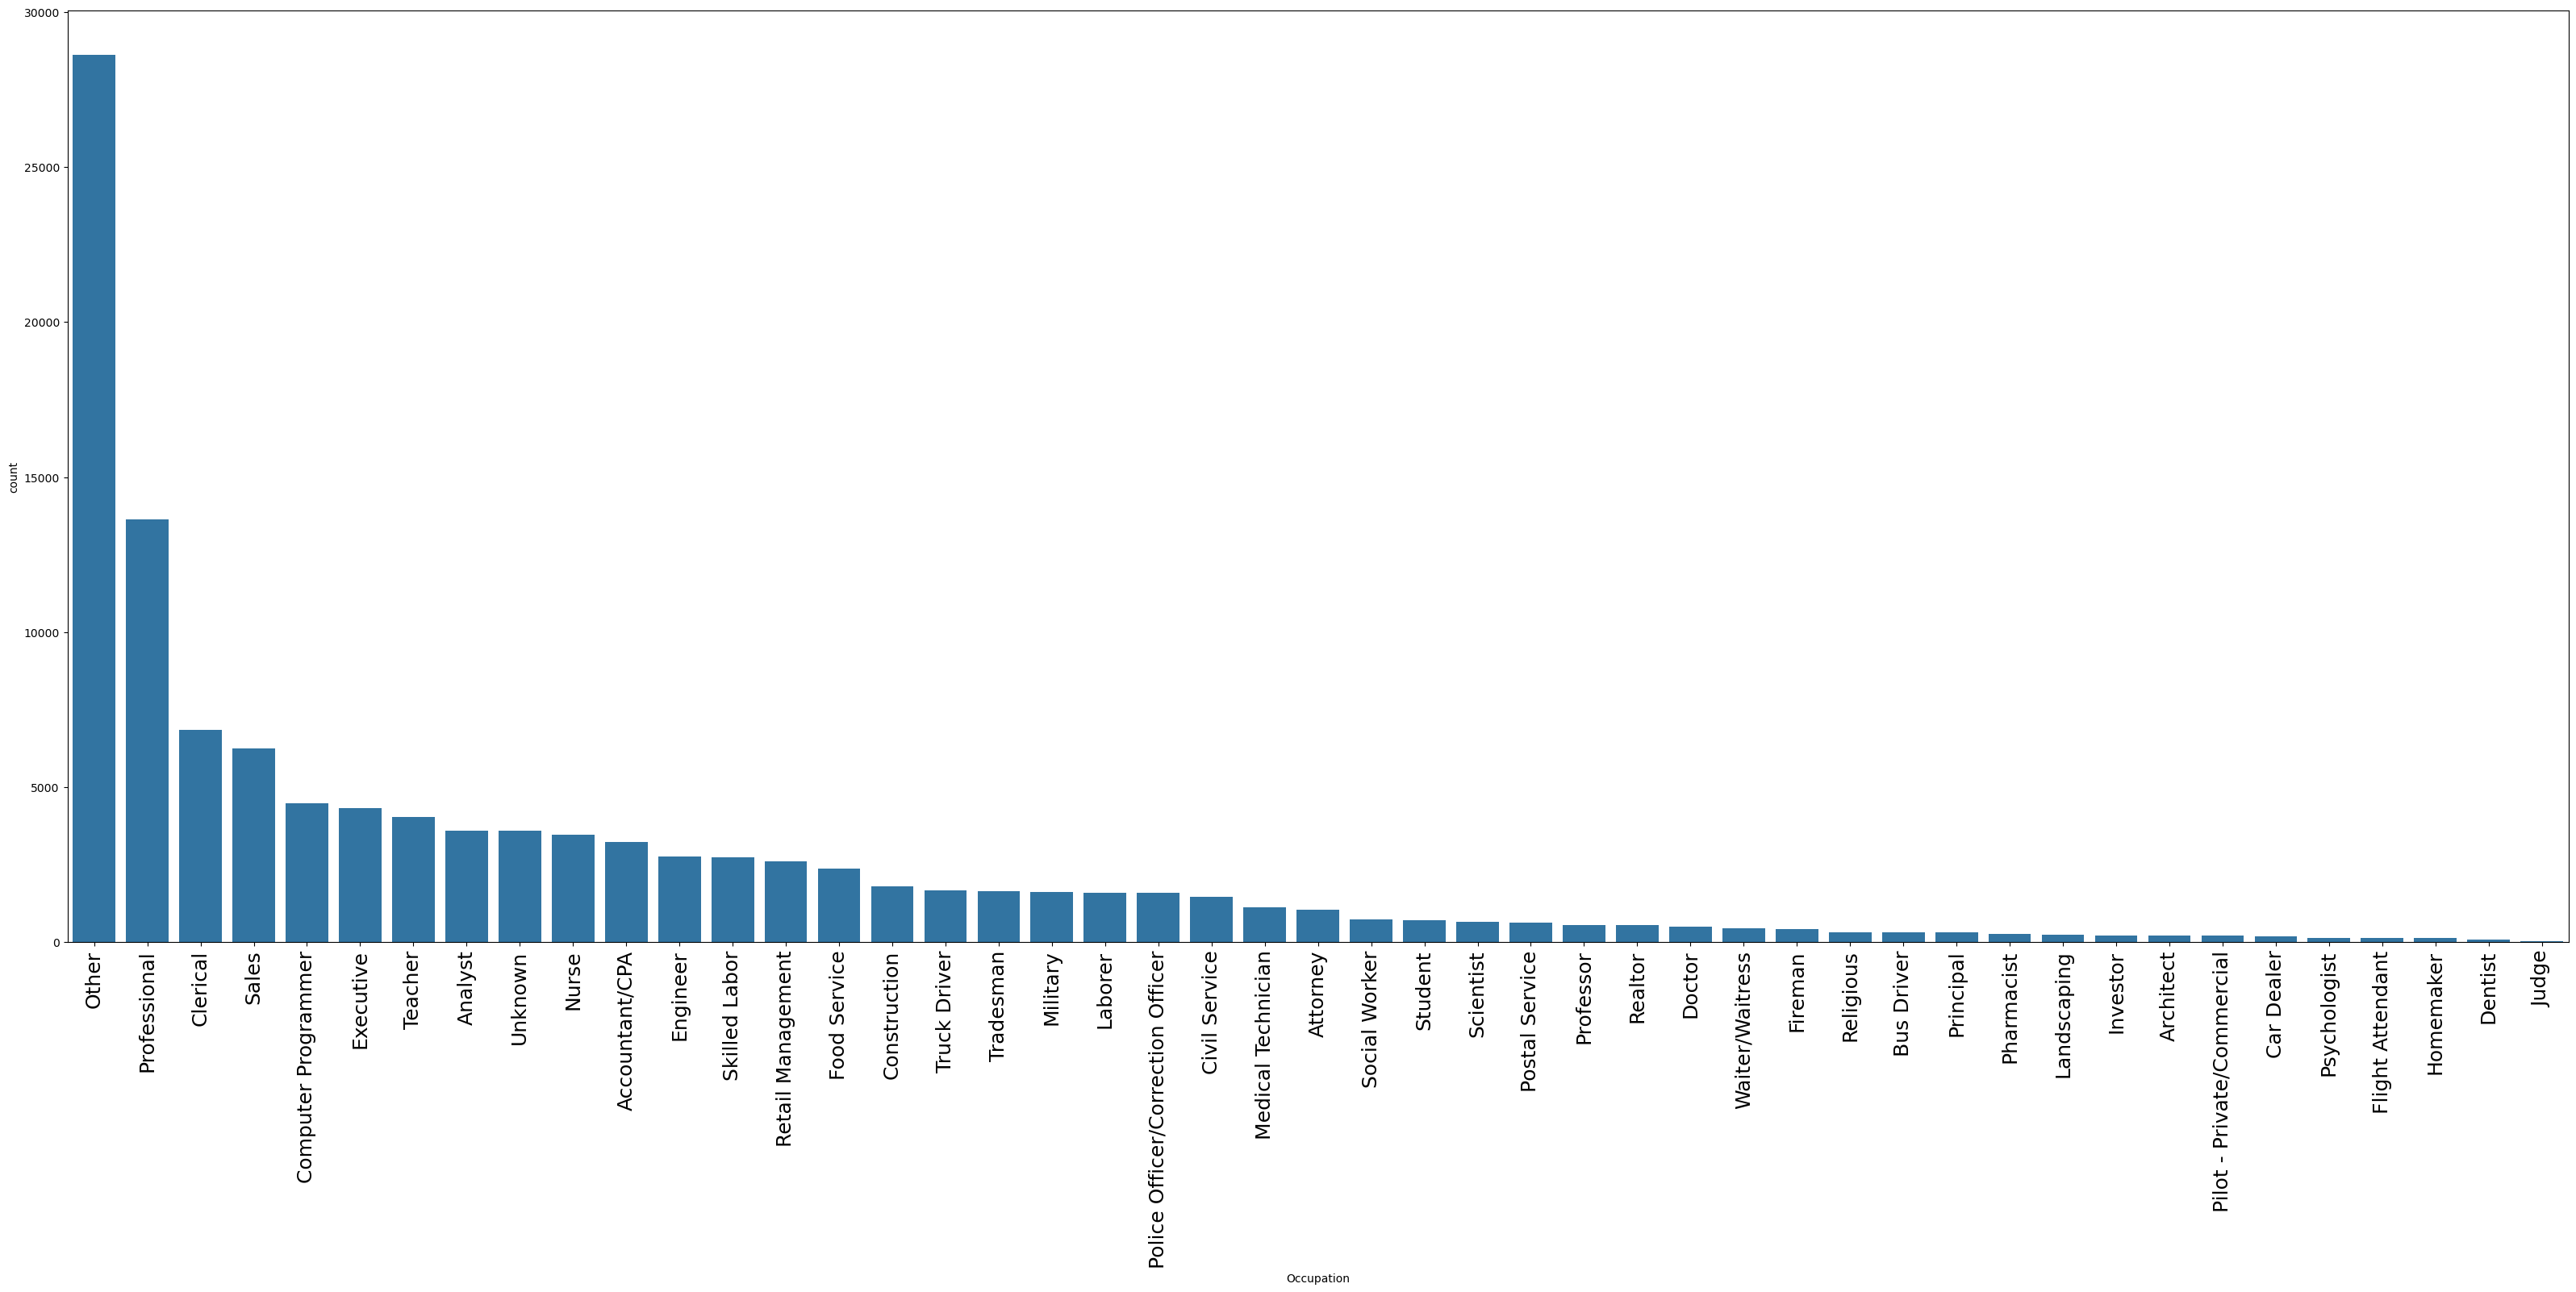

In [15]:
freq = prosper_df['Occupation'].value_counts()
gen_order = freq.index

base_color = sb.color_palette()[0]
sb.countplot(data = prosper_df, x='Occupation', color = base_color, order = gen_order);
plt.xticks(fontsize=18, rotation = 90);

from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 40,15

> While clerical staff and sales were high on the known number of loan beneficiaries, it can be understood because they are generally not very high salary earners. An outlier though, is executives, which could be because of business expansion. Professionals like dentists and judges typically did not take loans in numbers possibly due to their relatively higher salaries. It must however, be noted, the large unknown/others values. This could skew our results. Also, 'professionals', 'skilled labour', 'laborer' are rather ambiguous as well.

#### Borrower Interest Rate

> I would like to explore borrower interest rate at this juncture. Are rates related to occupation type or are there other parameters that affect rate?

In [16]:
prosper_df['BorrowerRate'].value_counts()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
          ... 
0.2201       1
0.0752       1
0.1416       1
0.2812       1
0.0739       1
Name: BorrowerRate, Length: 2294, dtype: int64

In [17]:
prosper_df['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

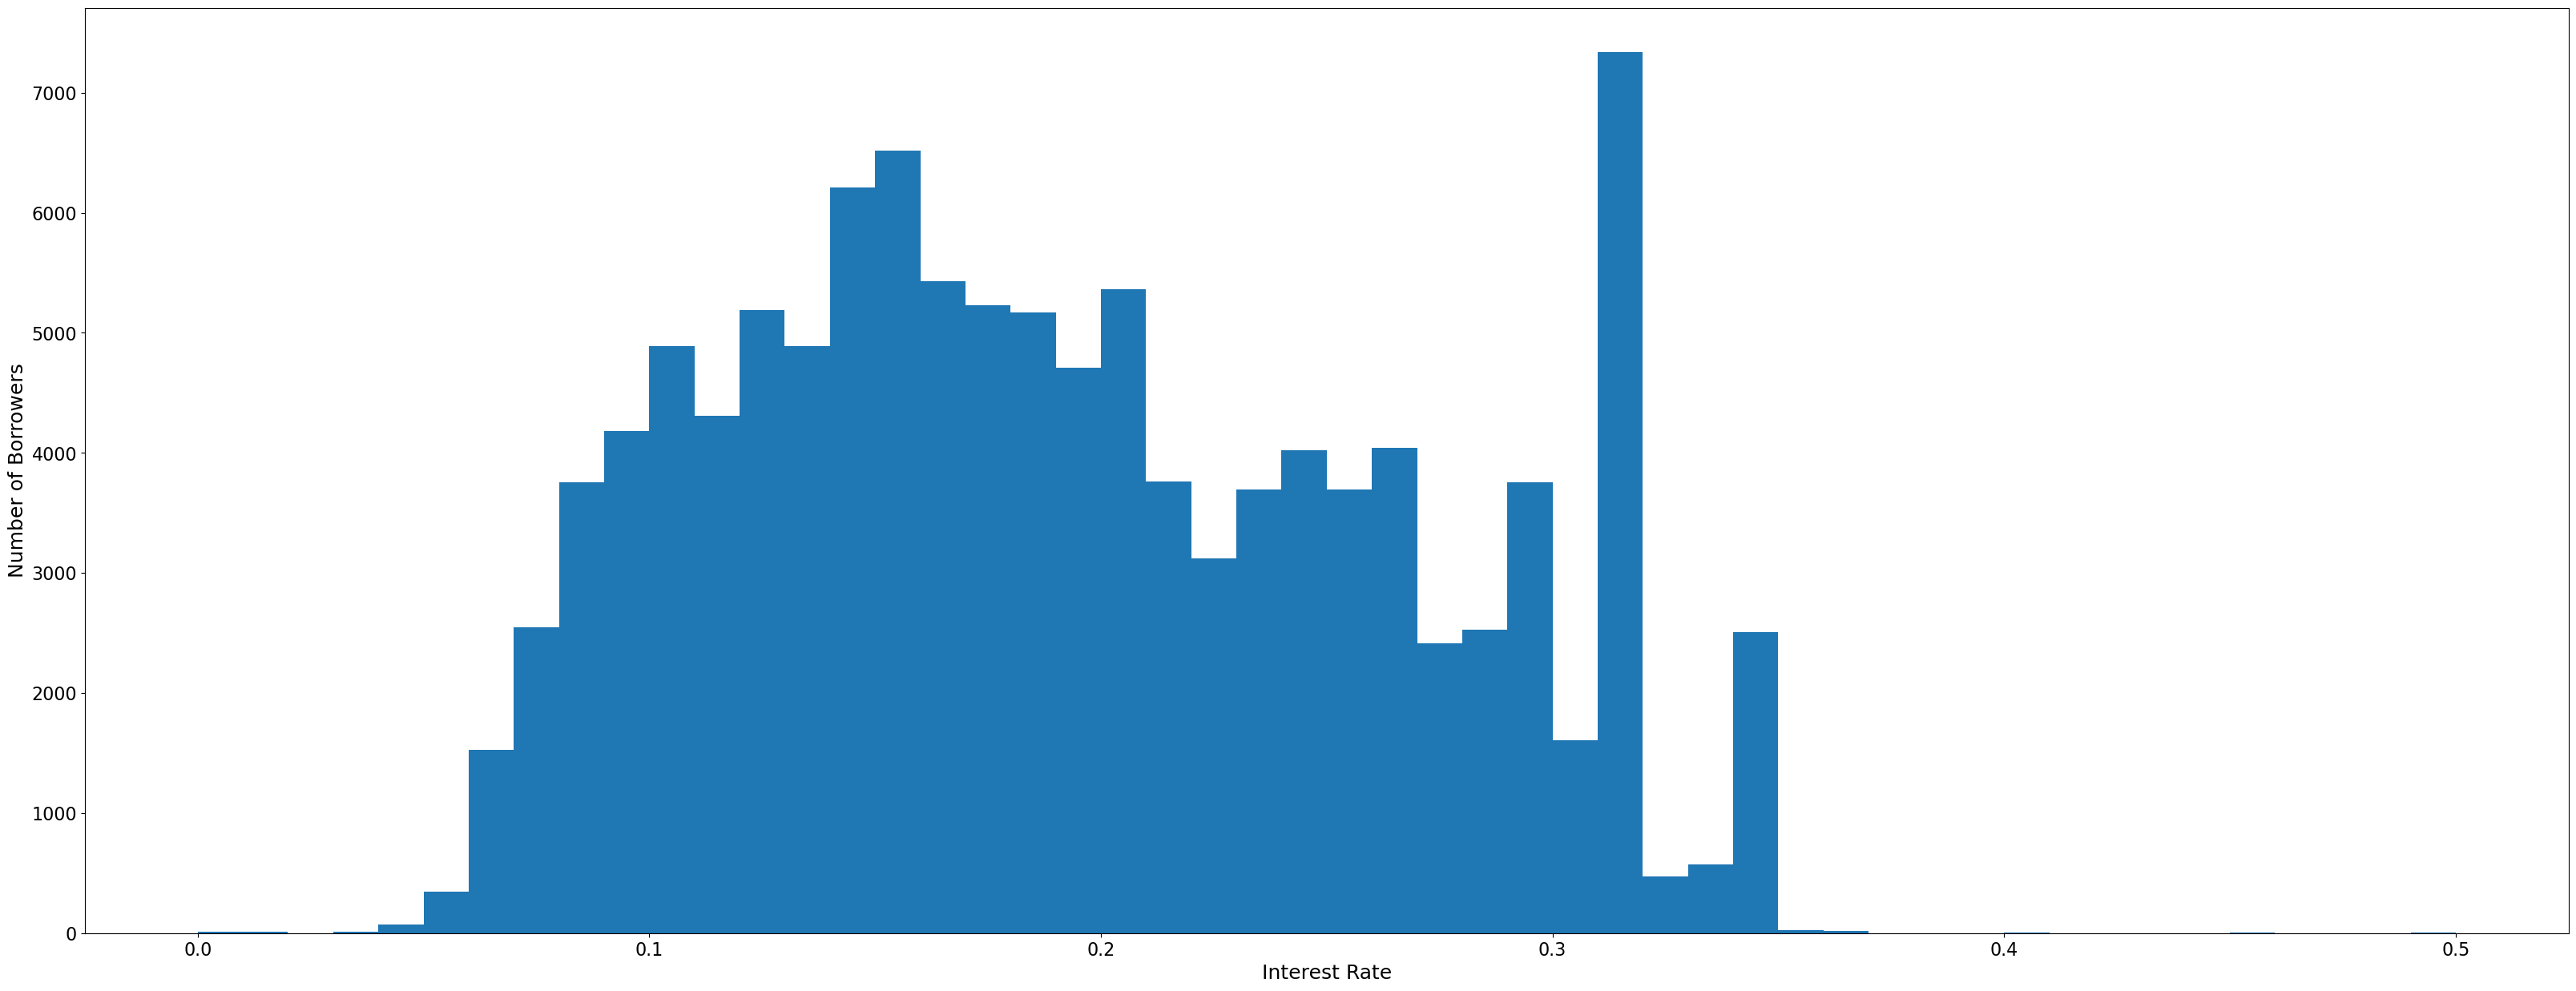

In [18]:
bins = np.arange(0, prosper_df['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data = prosper_df, x = 'BorrowerRate', bins = bins);

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

plt.xlabel('Interest Rate', fontsize=18)
plt.ylabel('Number of Borrowers', fontsize=18);

> Increasing the number of bins revealed that despite majority of the loans given at between 0.1 and 0.2 percent,
a rather large proportion of the loans were given at over 0.3 percent

#### Original Loan Amount

> Original loan amount will be explore next. This parameter will be critical for a lot of our exploration

In [19]:
prosper_df['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [20]:
# I use log because of the rather wide range for this variable
np.log10(prosper_df['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

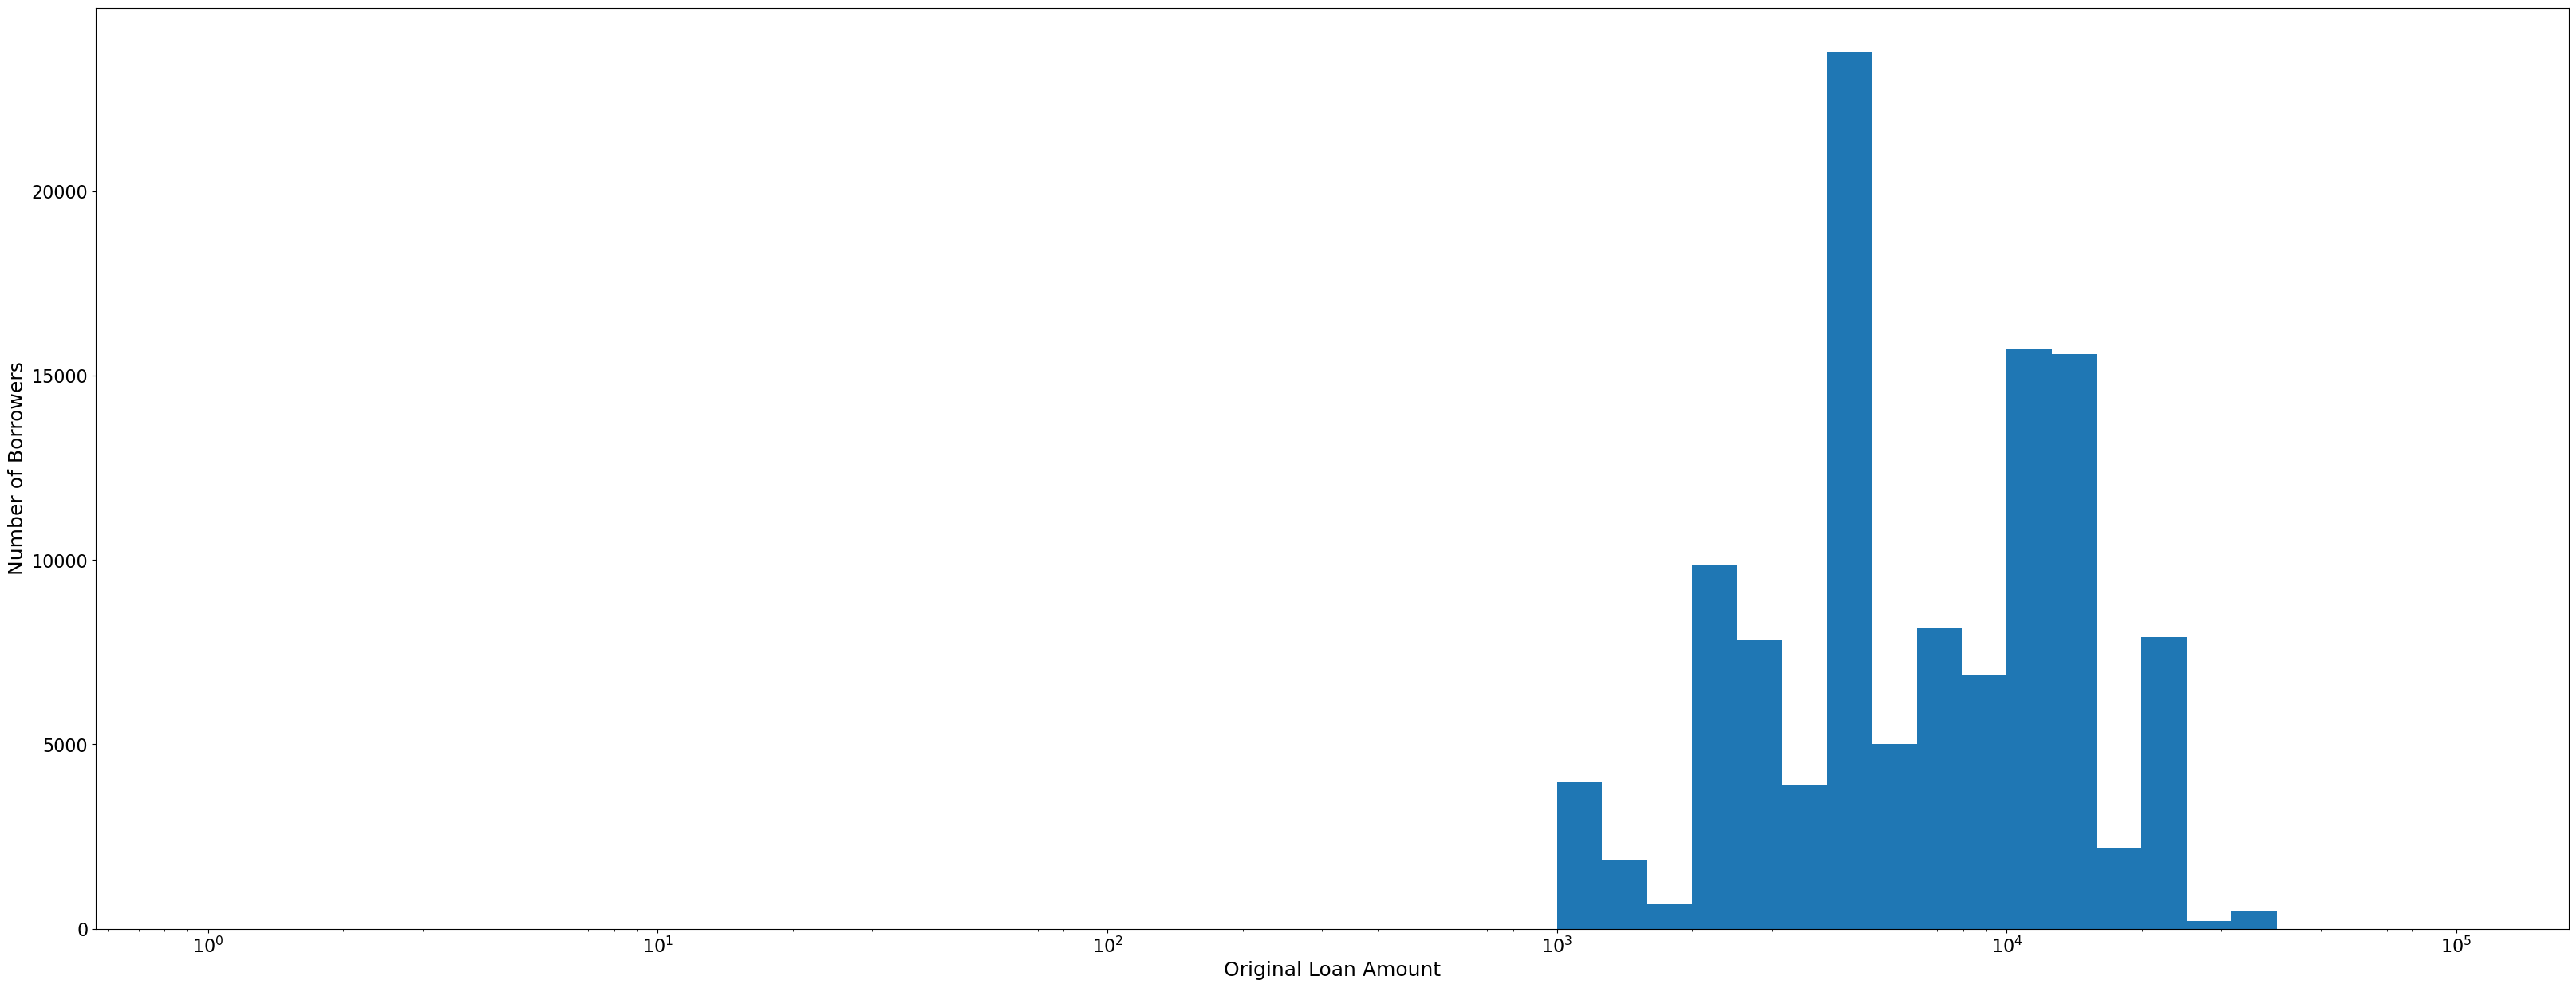

In [21]:
bins = 10 ** np.arange(0, 5+0.1, 0.1)
plt.hist(data=prosper_df, x='LoanOriginalAmount', bins=bins);

plt.xscale('log')

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

plt.xlabel('Original Loan Amount', fontsize=18)
plt.ylabel('Number of Borrowers', fontsize=18);

> Which occupation type took the max loan amount?

#### Employment Status

> Employment status should be an important parameter before any loan is availed

In [22]:
prosper_df['EmploymentStatus'].describe()

count       111682
unique           8
top       Employed
freq         67322
Name: EmploymentStatus, dtype: object

In [23]:
prosper_df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

> We wrangle to better categorise the entries into 3 braod categories of Total Employed, Total Unemployed and Total Others. Total Others includes other, not available and null entriesWe proceed to create a dictionary of the categoried entries and plot of donut plot with the information

In [24]:
Total_Unknown = prosper_df['EmploymentStatus'].isna().sum()

In [25]:
prosper_df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [26]:
Total_Employed = prosper_df['EmploymentStatus'].value_counts()[0] + prosper_df['EmploymentStatus'].value_counts()[1] + prosper_df['EmploymentStatus'].value_counts()[2] +prosper_df['EmploymentStatus'].value_counts()[5]

In [27]:
Total_Others = prosper_df['EmploymentStatus'].value_counts()[3] + prosper_df['EmploymentStatus'].value_counts()[4] + Total_Unknown

In [28]:
Total_Unemployed = prosper_df['EmploymentStatus'].value_counts()[6] + prosper_df['EmploymentStatus'].value_counts()[7]

In [29]:
Total_Employ_Status = Total_Employed + Total_Others + Total_Unemployed
Total_Employ_Status

113937

In [30]:
#create a sequence of strings
employstatus = ('Total Employed','Total Others', 'Total Unemployed')

#create a single value
statusnumbers = [Total_Employed, Total_Others, Total_Unemployed]


EmployStatus = {'Total Employed': Total_Employed, 'Total Others': Total_Others, 'Total Unemployed': Total_Unemployed}
print(EmployStatus)

{'Total Employed': 100899, 'Total Others': 11408, 'Total Unemployed': 1630}


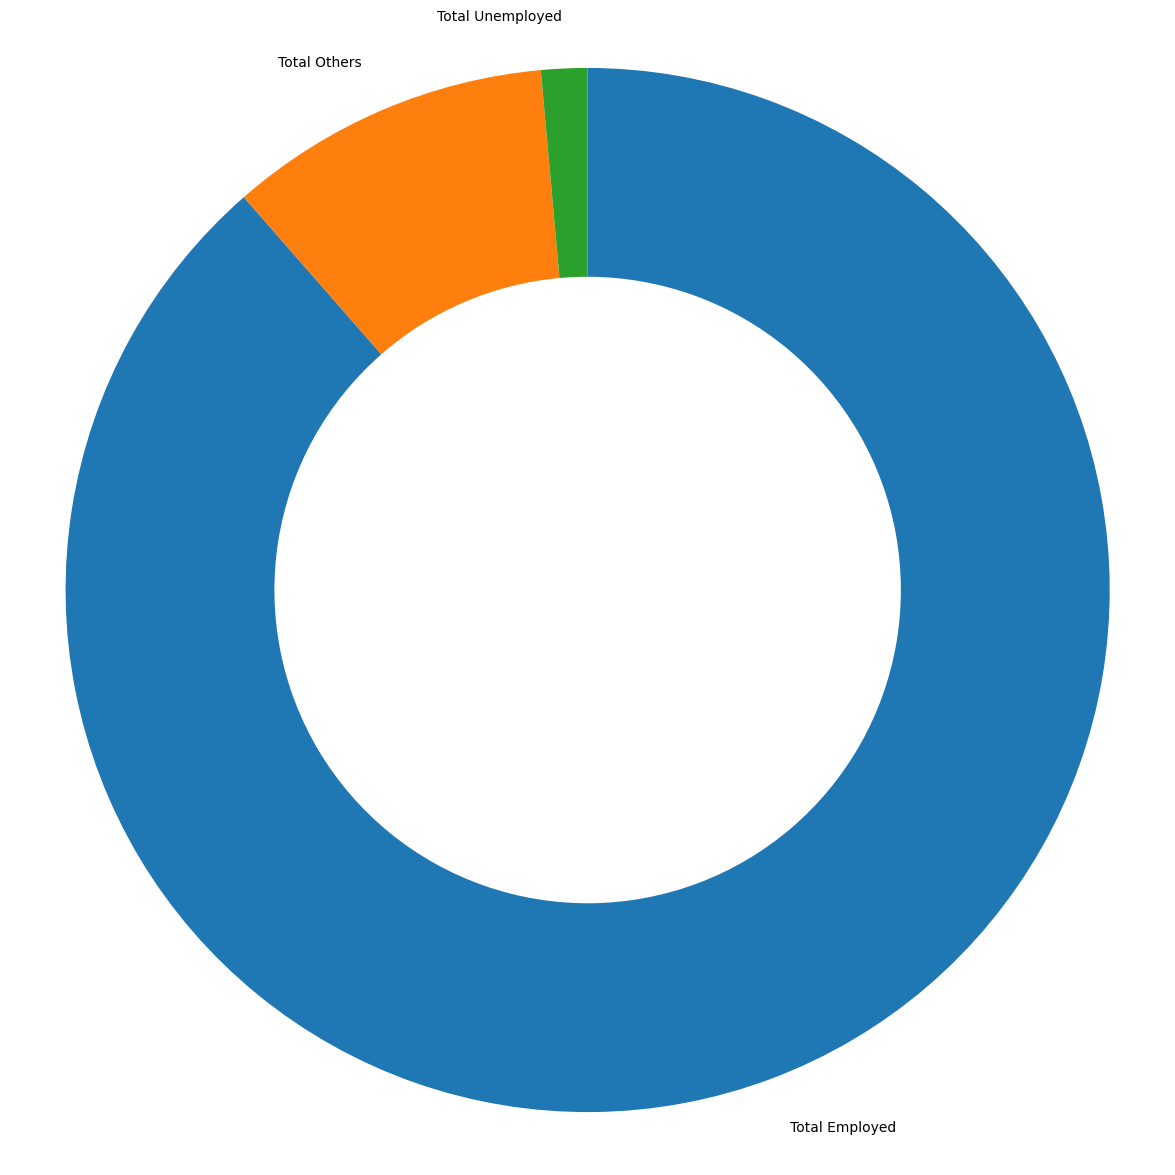

In [31]:
# Data to plot
labels = []
sizes = []

for x, y in EmployStatus.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels = labels, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

plt.show()

> We must note that Total Others includes unknown values which could incorporate unemployed or employed entries once the information is discovered

#### Deliquent Amount

> Deliquent amounts/ bad loans is another important attribute for any lending company

In [32]:
prosper_df['AmountDelinquent'].describe()

count    106315.000000
mean        984.507059
std        7158.270157
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

In [33]:
prosper_df['AmountDelinquent'].isna().sum()

7622

In [34]:
# I decide to fill missing values with the mean deliquent amount

prosper_df['AmountDelinquent'].fillna(prosper_df['AmountDelinquent'].mean(), inplace=True)

In [35]:
# I use log because of the high range

np.log10(prosper_df['AmountDelinquent'].describe())

C:\Users\IKENNA\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.056665
mean     2.993219
std      3.839773
min          -inf
25%          -inf
50%          -inf
75%          -inf
max      5.666407
Name: AmountDelinquent, dtype: float64

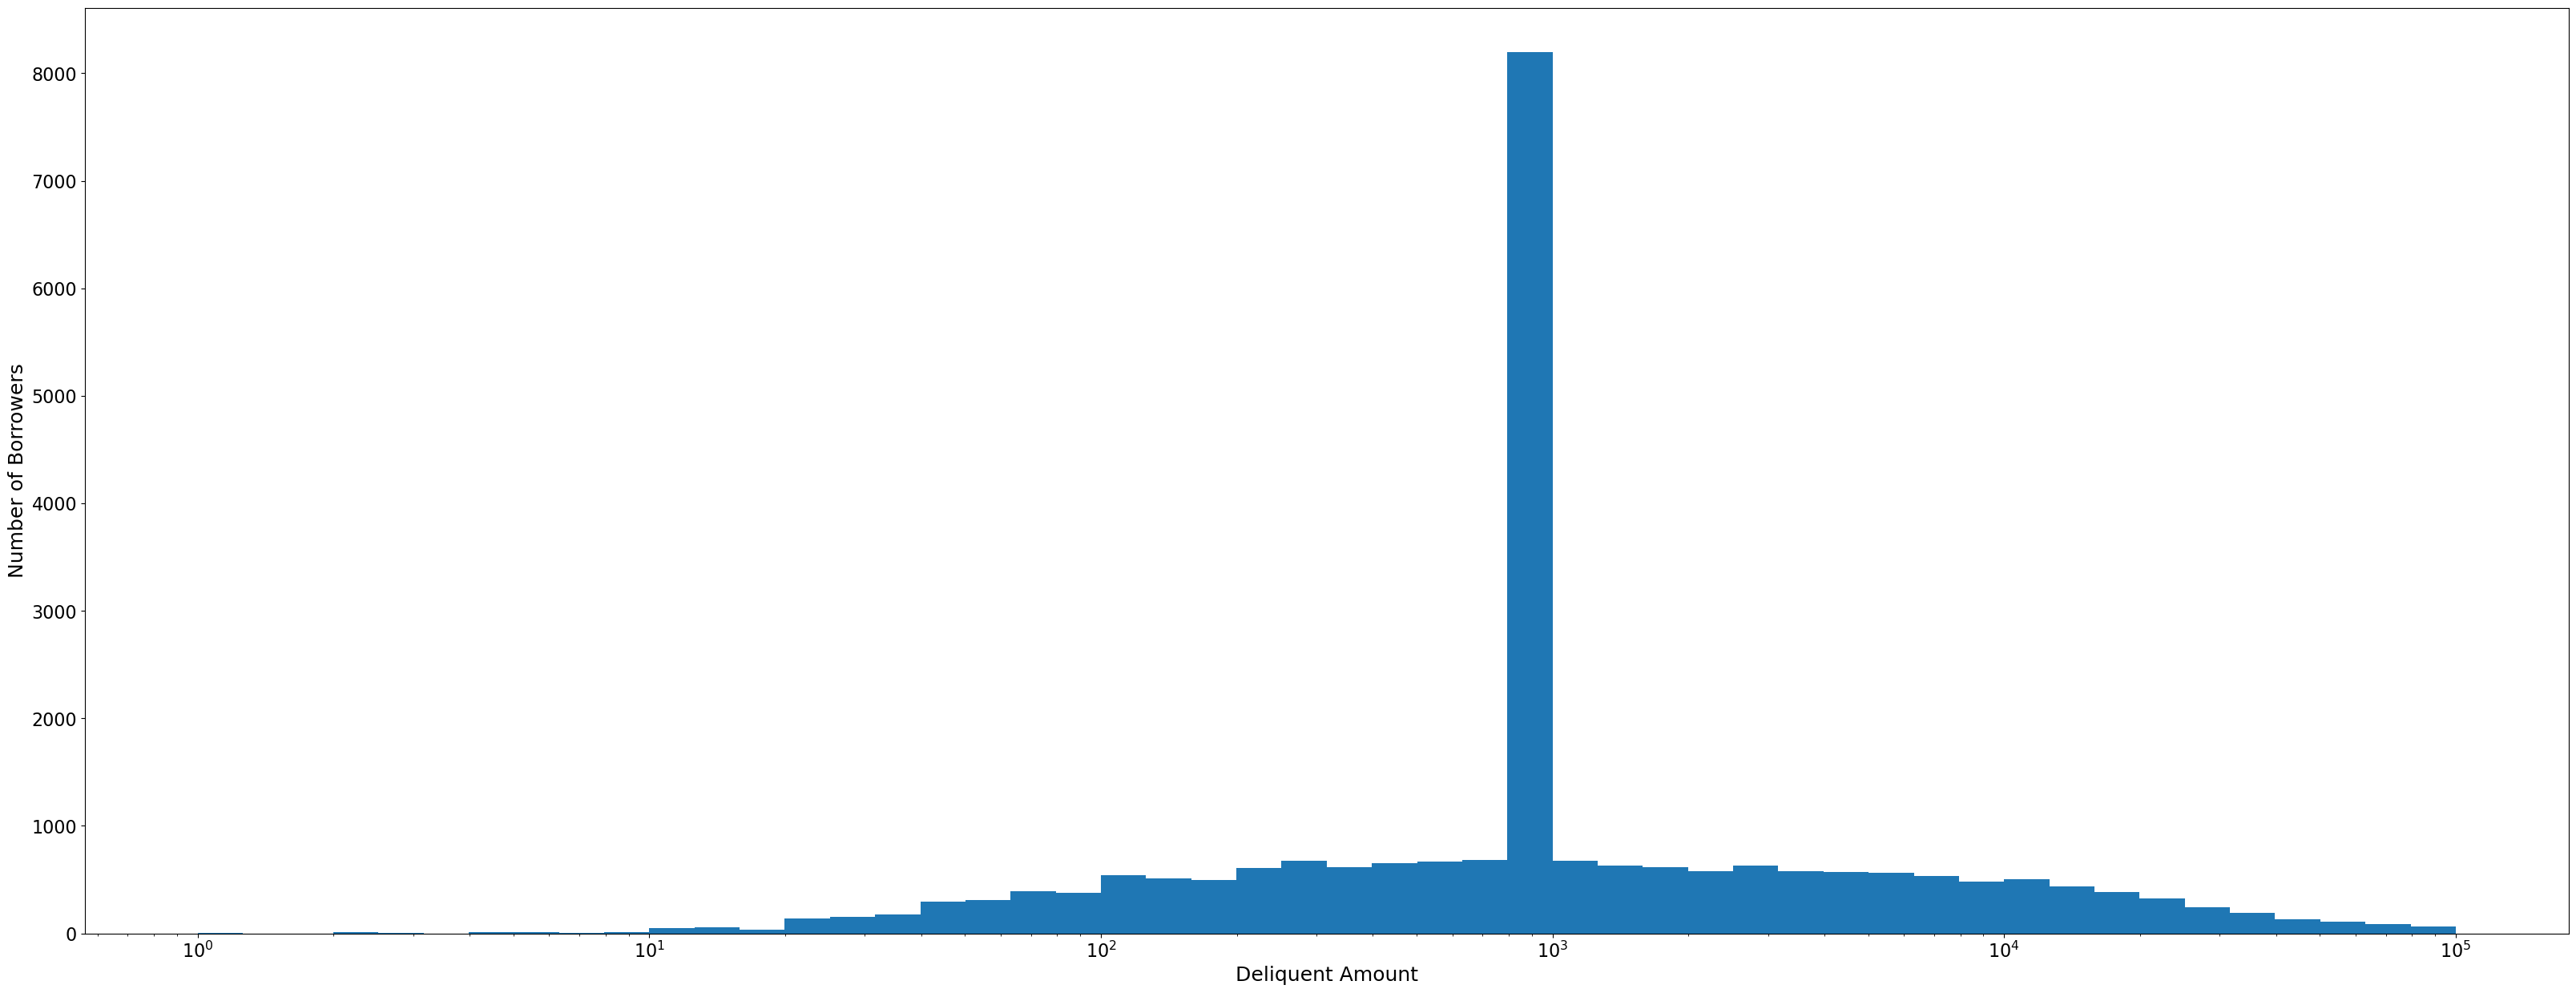

In [36]:
bins = 10 ** np.arange(0, 5+0.1, 0.1)
plt.hist(data=prosper_df, x='AmountDelinquent', bins=bins);

plt.xscale('log')

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

plt.xlabel('Deliquent Amount', fontsize=18)
plt.ylabel('Number of Borrowers', fontsize=18);

from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 40,20

> While the average deliquent amount peaks at about 1000 dollars, there are still over 8000 borrowers who have deliquent loans.
This underscores the bank's need to adopt more serious bad loan recovery efforts especially as there are deliquent loans  
over 100,000 dollars.

#### Stated Monthly Income

> Monthly income is another important attribute for any lending company

In [37]:
prosper_df['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [38]:
prosper_df['StatedMonthlyIncome'].isna().sum()

0

In [39]:
# I use log because of the high range

np.log10(prosper_df['StatedMonthlyIncome'].describe())

C:\Users\IKENNA\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.056665
mean     3.748810
std      3.873814
min          -inf
25%      3.505195
50%      3.669007
75%      3.834103
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

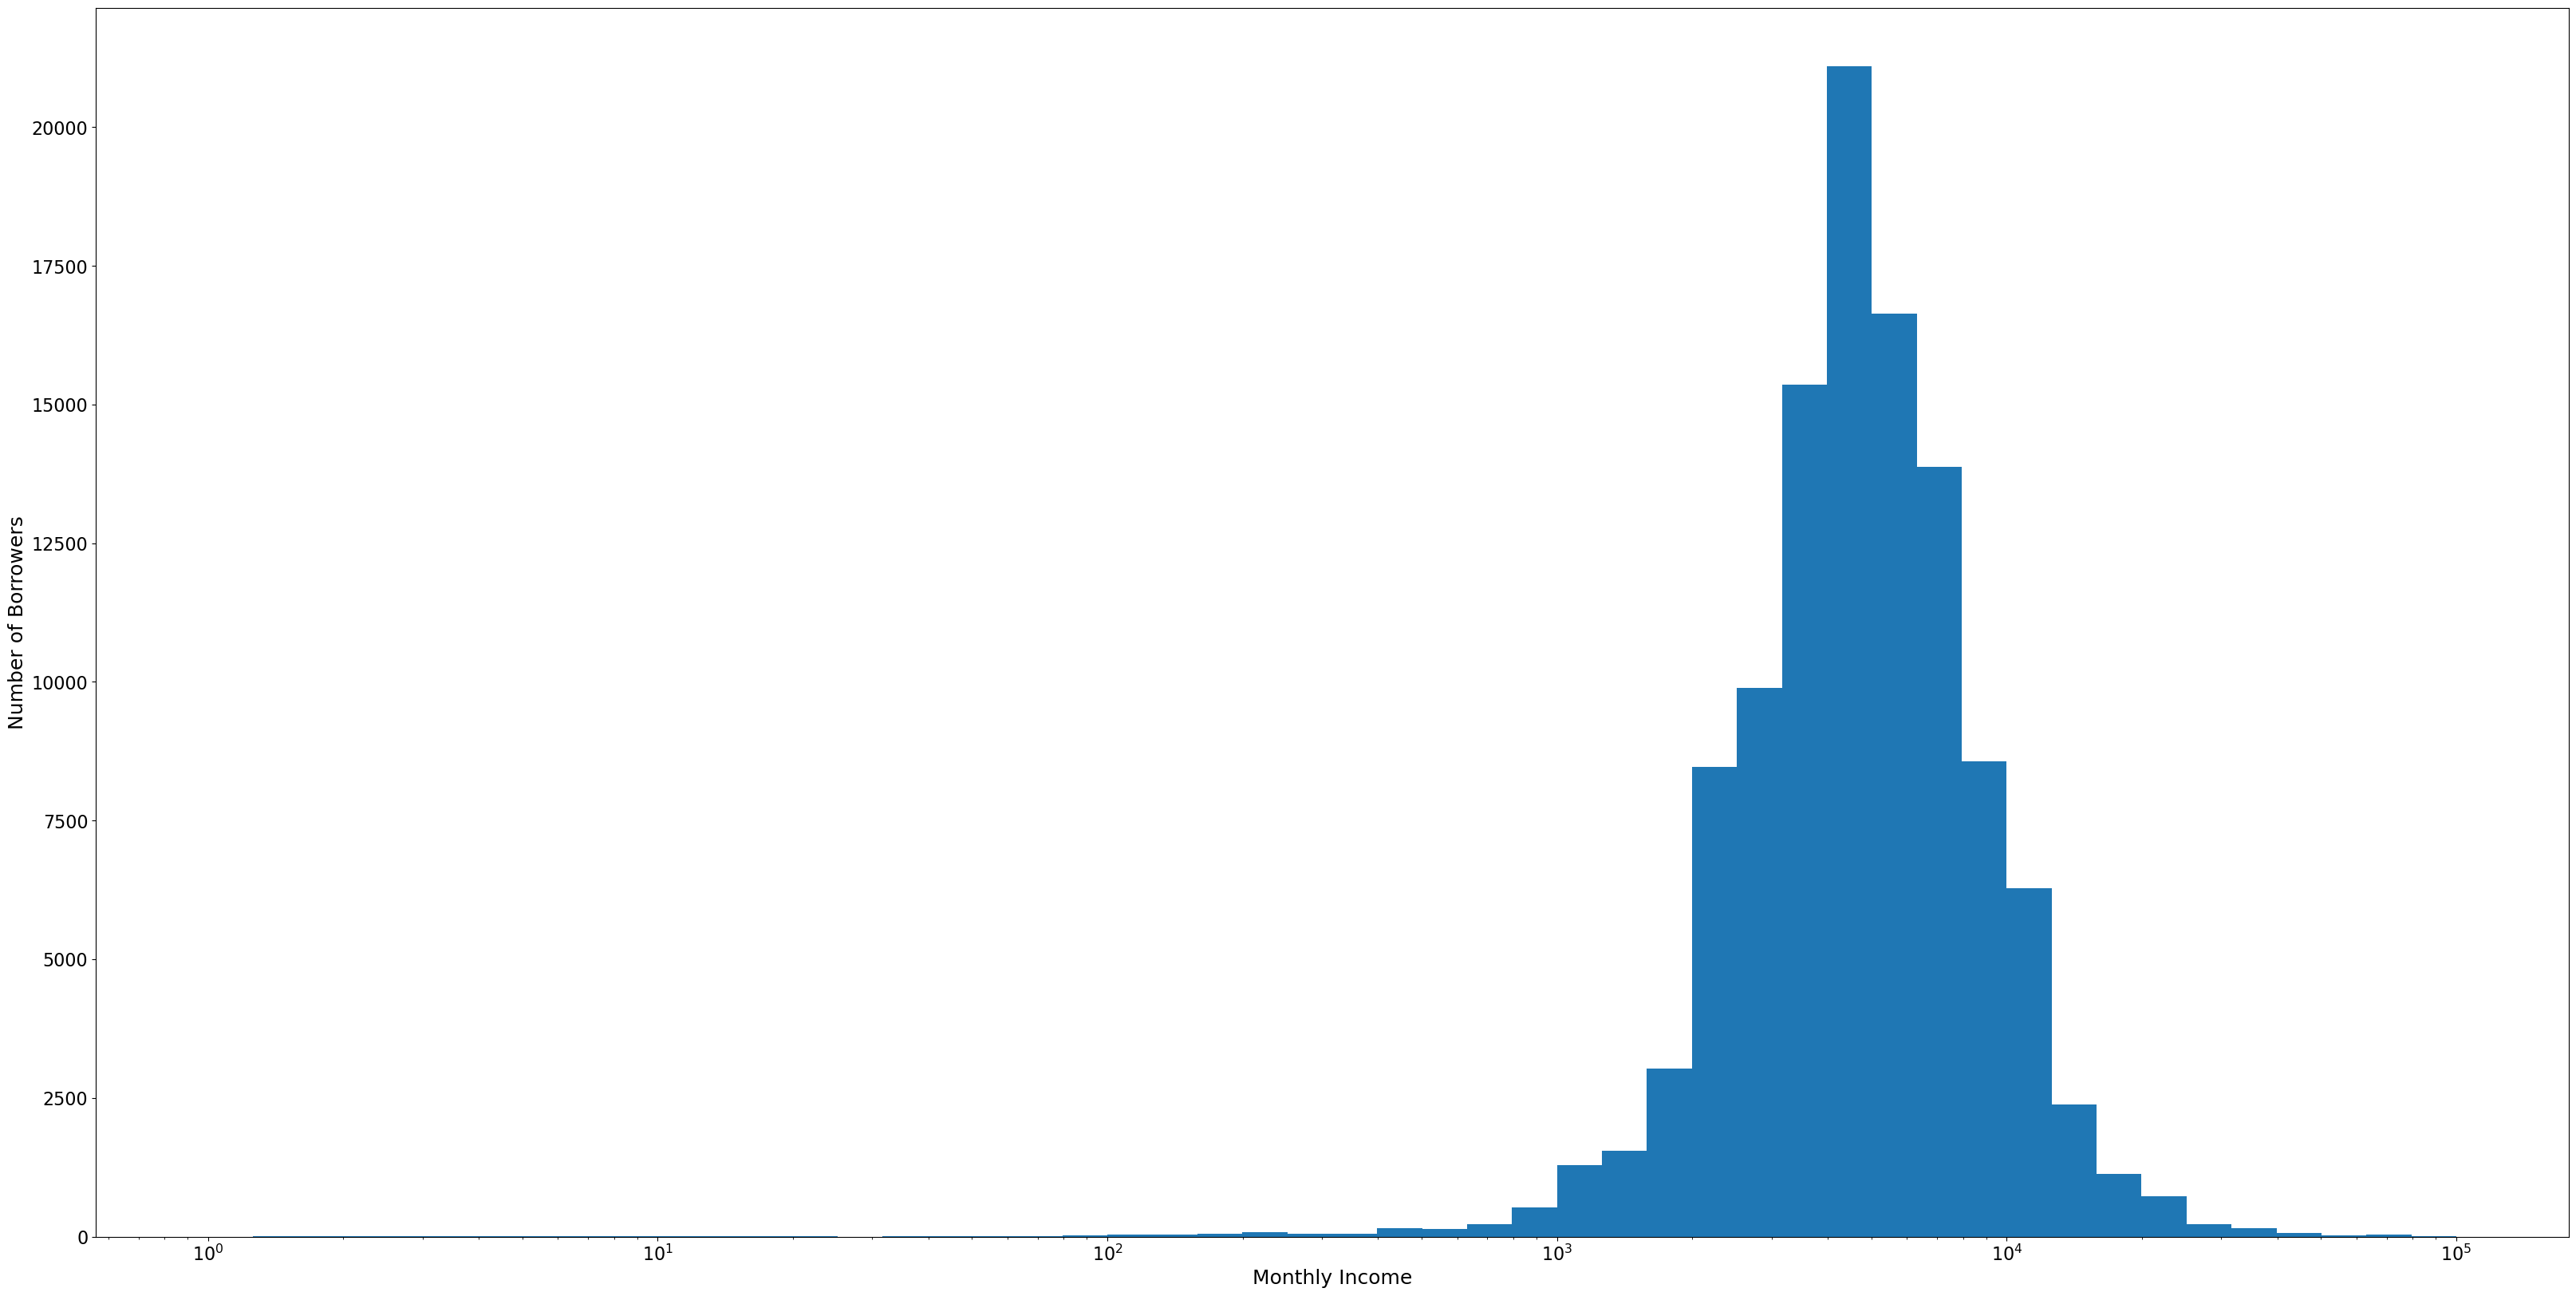

In [40]:
bins = 10 ** np.arange(0, 5+0.1, 0.1)
plt.hist(data=prosper_df, x='StatedMonthlyIncome', bins=bins);

plt.xscale('log')

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

plt.xlabel('Monthly Income', fontsize=18)
plt.ylabel('Number of Borrowers', fontsize=18);

from matplotlib import rcParams
rcParams['figure.figsize'] = 40,20

#### Loan Status

In [41]:
prosper_df['LoanStatus'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113937 entries, 0 to 113936
Series name: LoanStatus
Non-Null Count   Dtype 
--------------   ----- 
113937 non-null  object
dtypes: object(1)
memory usage: 890.3+ KB


In [42]:
prosper_df['LoanStatus'].describe()

count      113937
unique         12
top       Current
freq        56576
Name: LoanStatus, dtype: object

In [43]:
prosper_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [44]:
loanstatus_ordered = ["Completed", "FinalPaymentInProgress", "Current", "Past Due (1-15 days)", "Past Due (16-30 days)"\
                      ,"Past Due (31-60 days)", "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)"\
                      ,"Defaulted", "Cancelled"]

prosper_df['LoanStatusOrdered'] = pd.Categorical(prosper_df['LoanStatus'], categories=loanstatus_ordered, ordered=True)

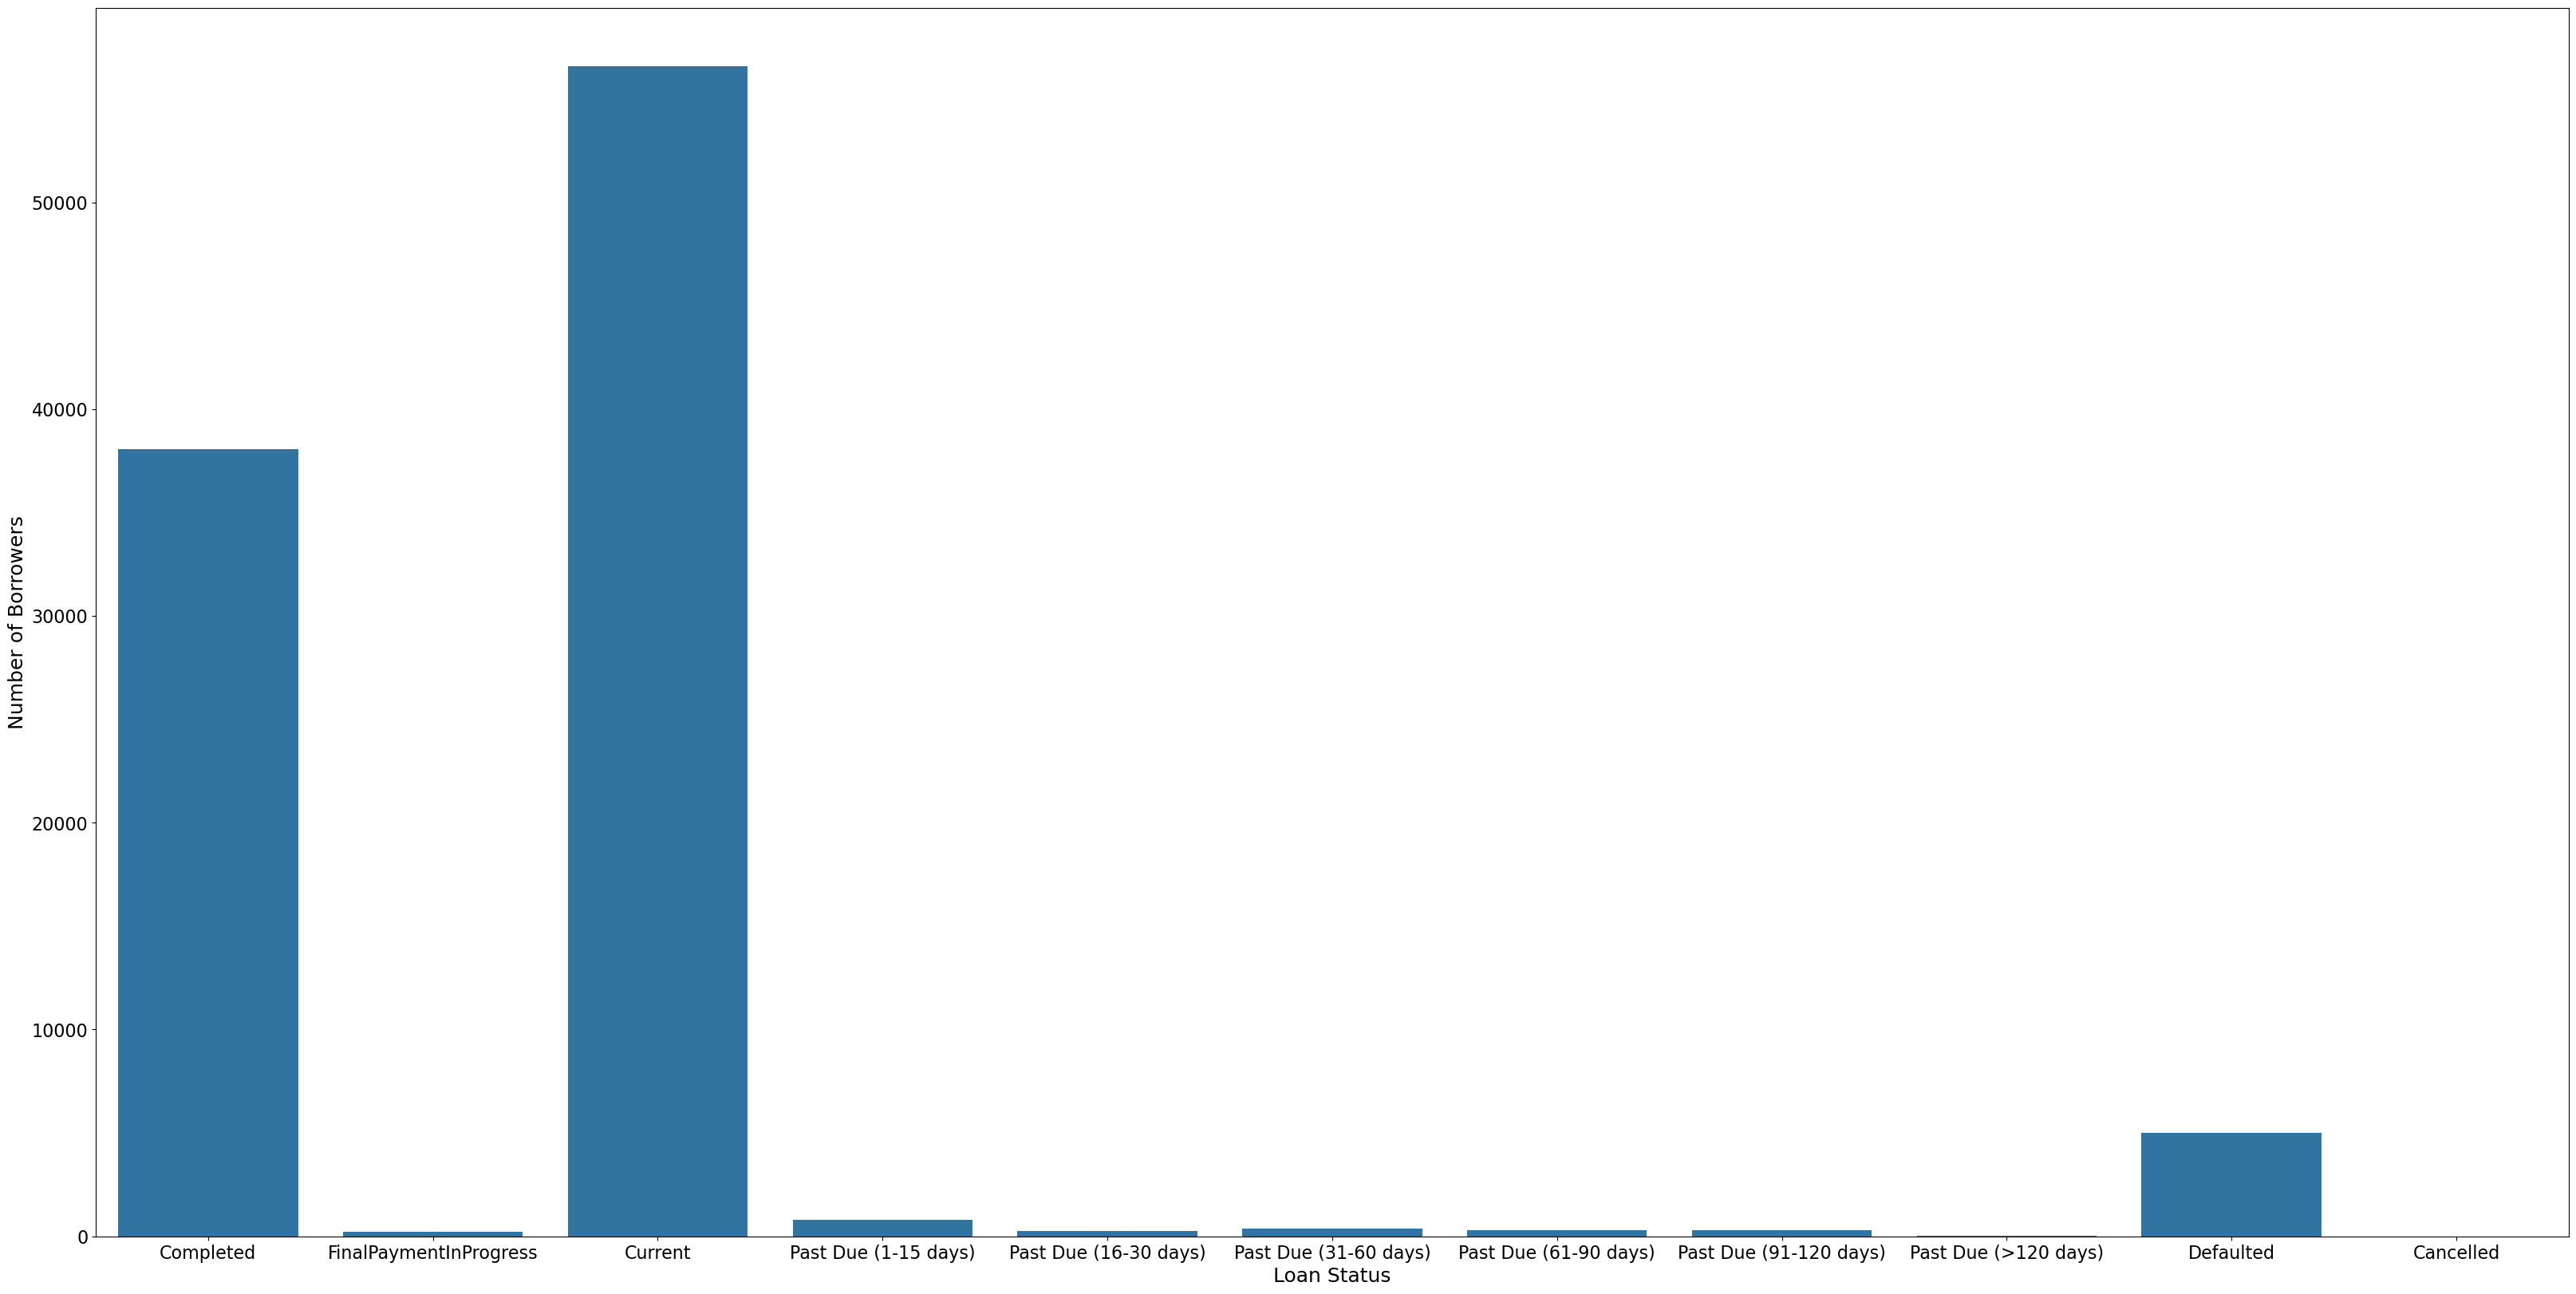

In [45]:
base_color = sb.color_palette()[0]

sb.countplot(data=prosper_df, x='LoanStatusOrdered', color=base_color);

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

plt.xlabel('Loan Status', fontsize=18)
plt.ylabel('Number of Borrowers', fontsize=18);

from matplotlib import rcParams
rcParams['figure.figsize'] = 40,20

> Past due loans are low. However, there are a number of defaulted and chargedoff which could affect the institution's bottom line.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The 'Occupation' variable had an unusual amount of 'others' and 'unknown' values. It also has a number of ambigugous values which I had to manually group to reduce noise in the plots. Hence, we had to wrangle on this varibale.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to use log for the 'Amount Deliquent' and 'LoanOriginalAmount' entries. This is because of the large ranges betweeen their minimum and maximum values. I also had to better group the entries for 'EmploymentStatus' column as they were ambiguous.

## Bivariate Exploration



#### Original Loan Amount Vs. Occupation

> I will first explore the relationship between Occupation and Loan Amount availed

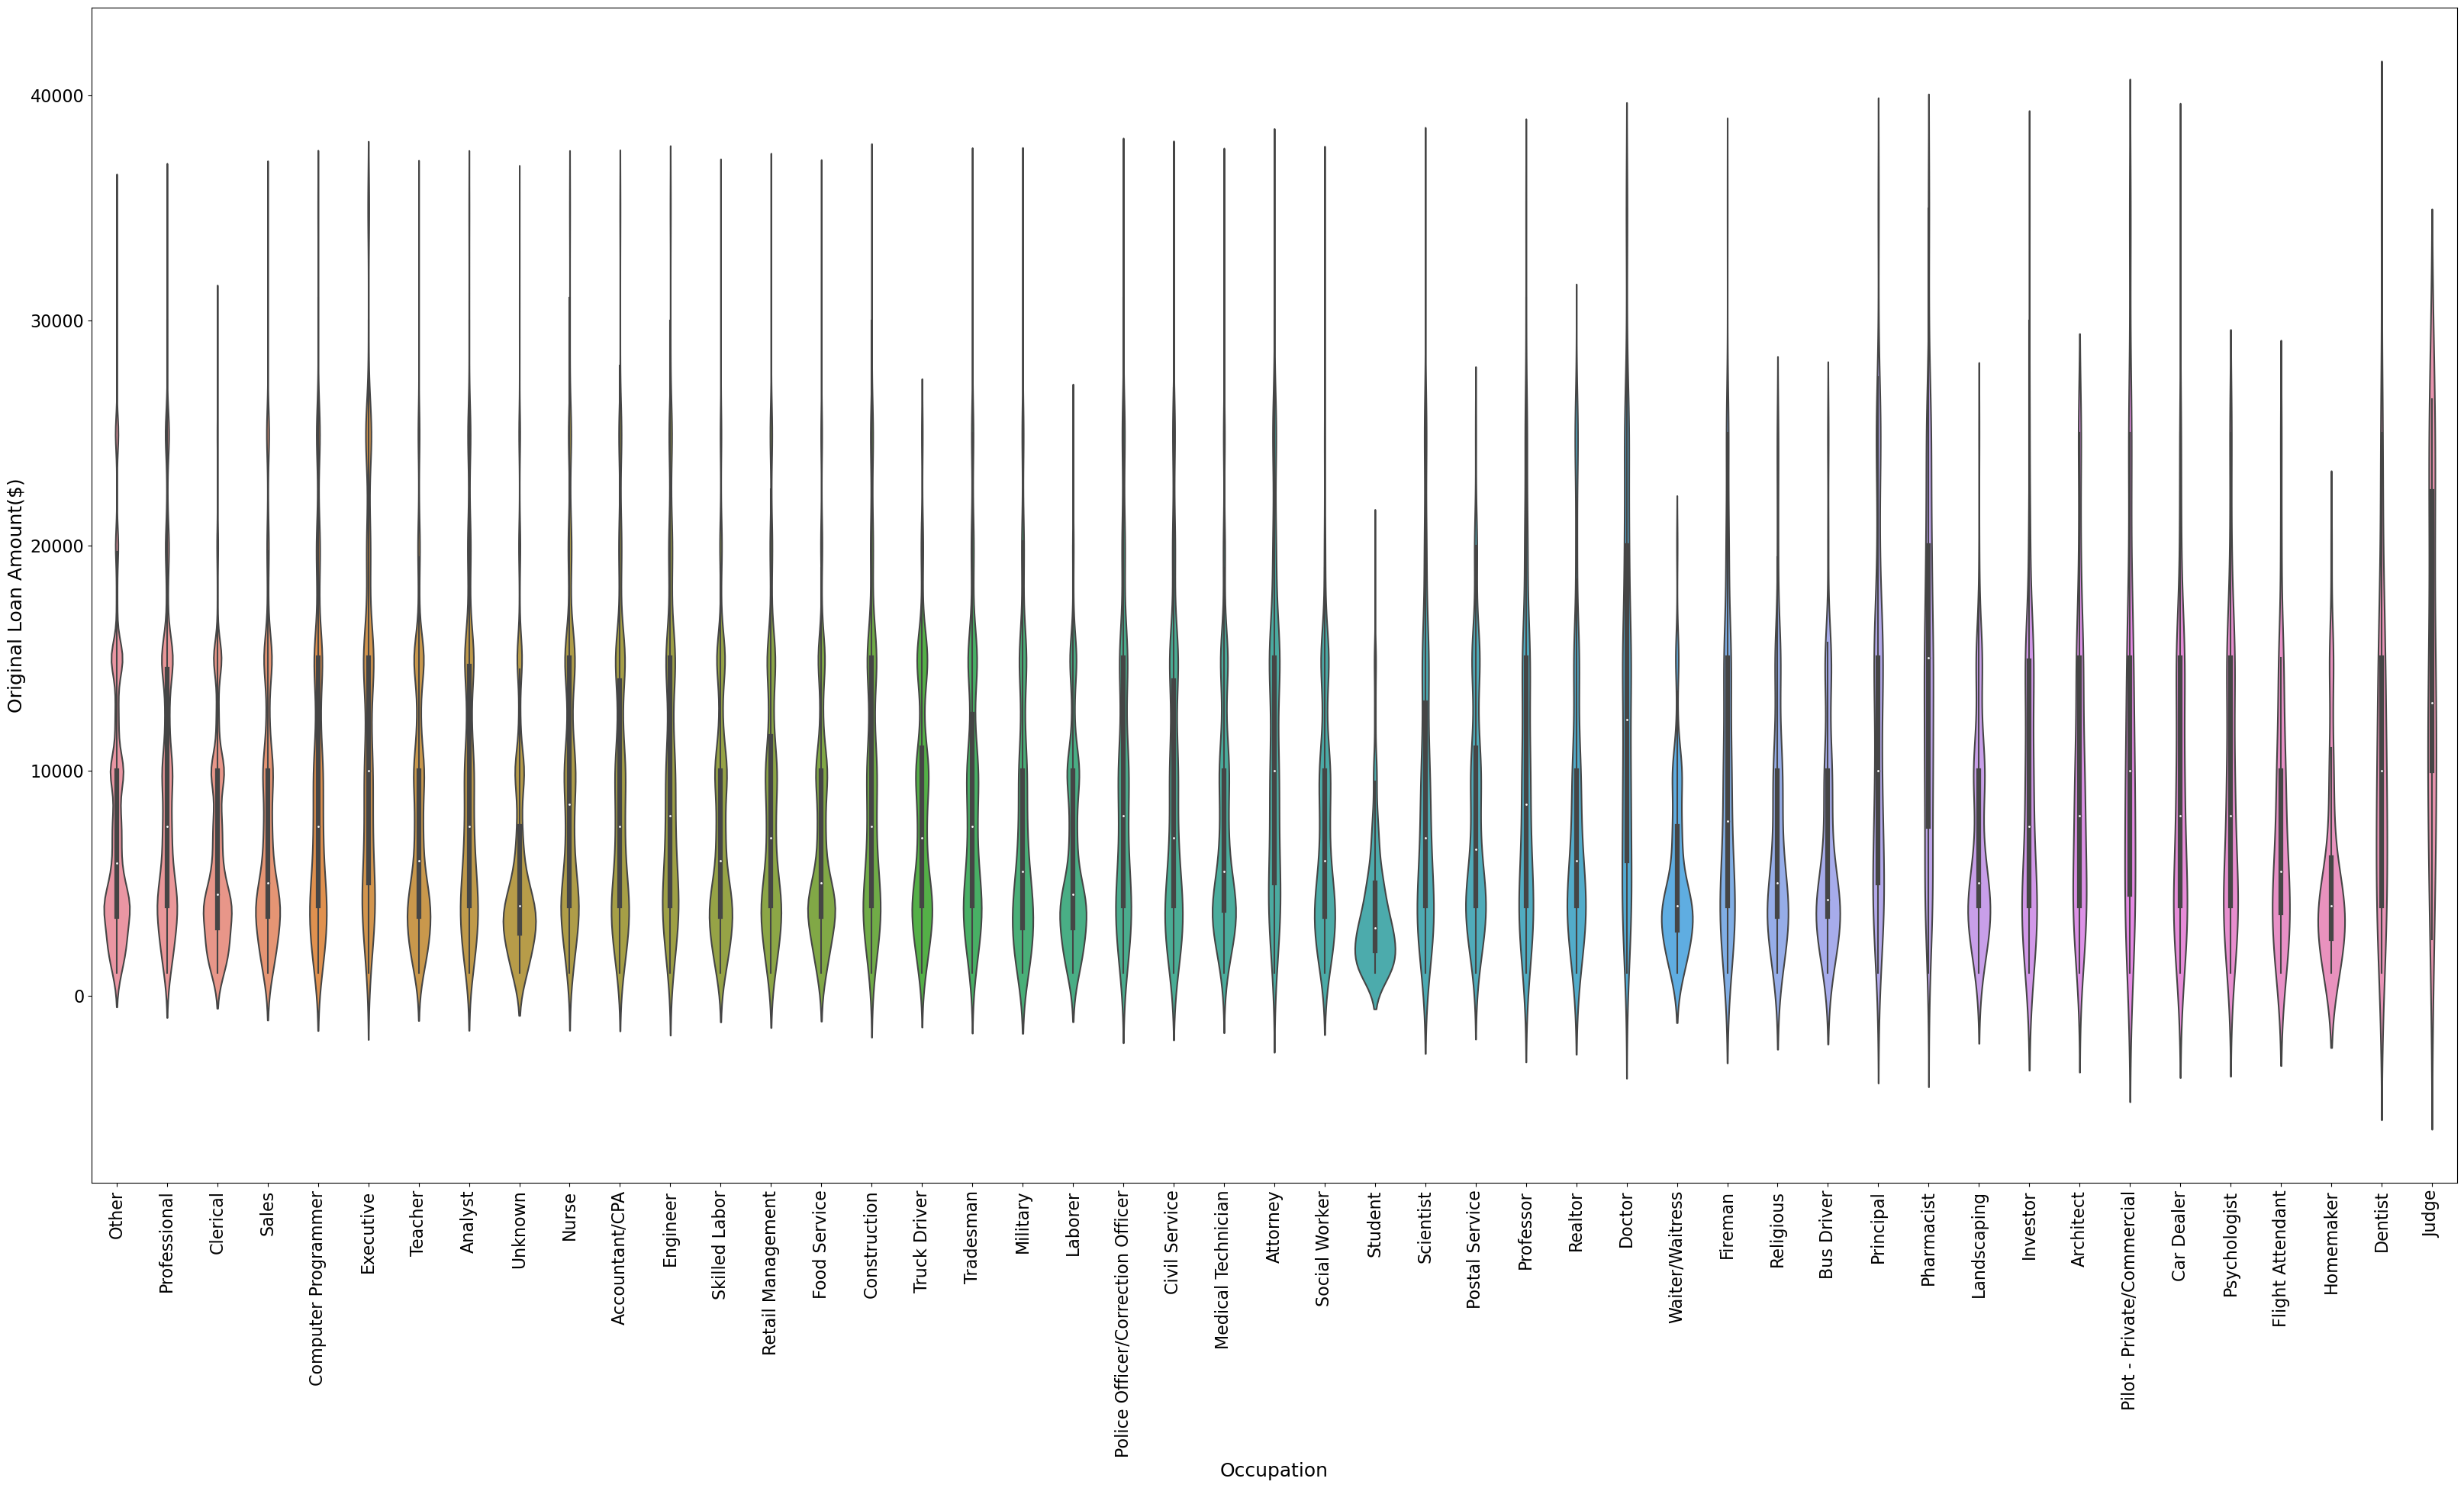

In [46]:
occupation_types = prosper_df['Occupation'].value_counts().index
occu_class = pd.api.types.CategoricalDtype(ordered=True, categories=occupation_types)
prosper_df['Occupation'] = prosper_df['Occupation'].astype(occu_class);

sb.violinplot(data=prosper_df, x='Occupation', y='LoanOriginalAmount');
plt.xticks(fontsize=16, rotation = 90);
plt.yticks(fontsize=16);
plt.xlabel('Occupation', fontsize=18)
plt.ylabel('Original Loan Amount($)', fontsize=18)

from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 35,15

> From the chart, it is seen that a bulk of most occupations took loans below 10,000 dollars. However, more highly skilled occupations like doctors, pharmacists, engineers, pilots, attorneys, dentists and judges had a more evenly spread loan amount distribution

> For a clearer depiction of the relationship between occupation and original loan amount, we use facetting on a histogram

In [47]:
occupation_types = prosper_df['Occupation'].value_counts().index
occu_class = pd.api.types.CategoricalDtype(ordered=True, categories=occupation_types)
prosper_df['Occupation'] = prosper_df['Occupation'].astype(occu_class);

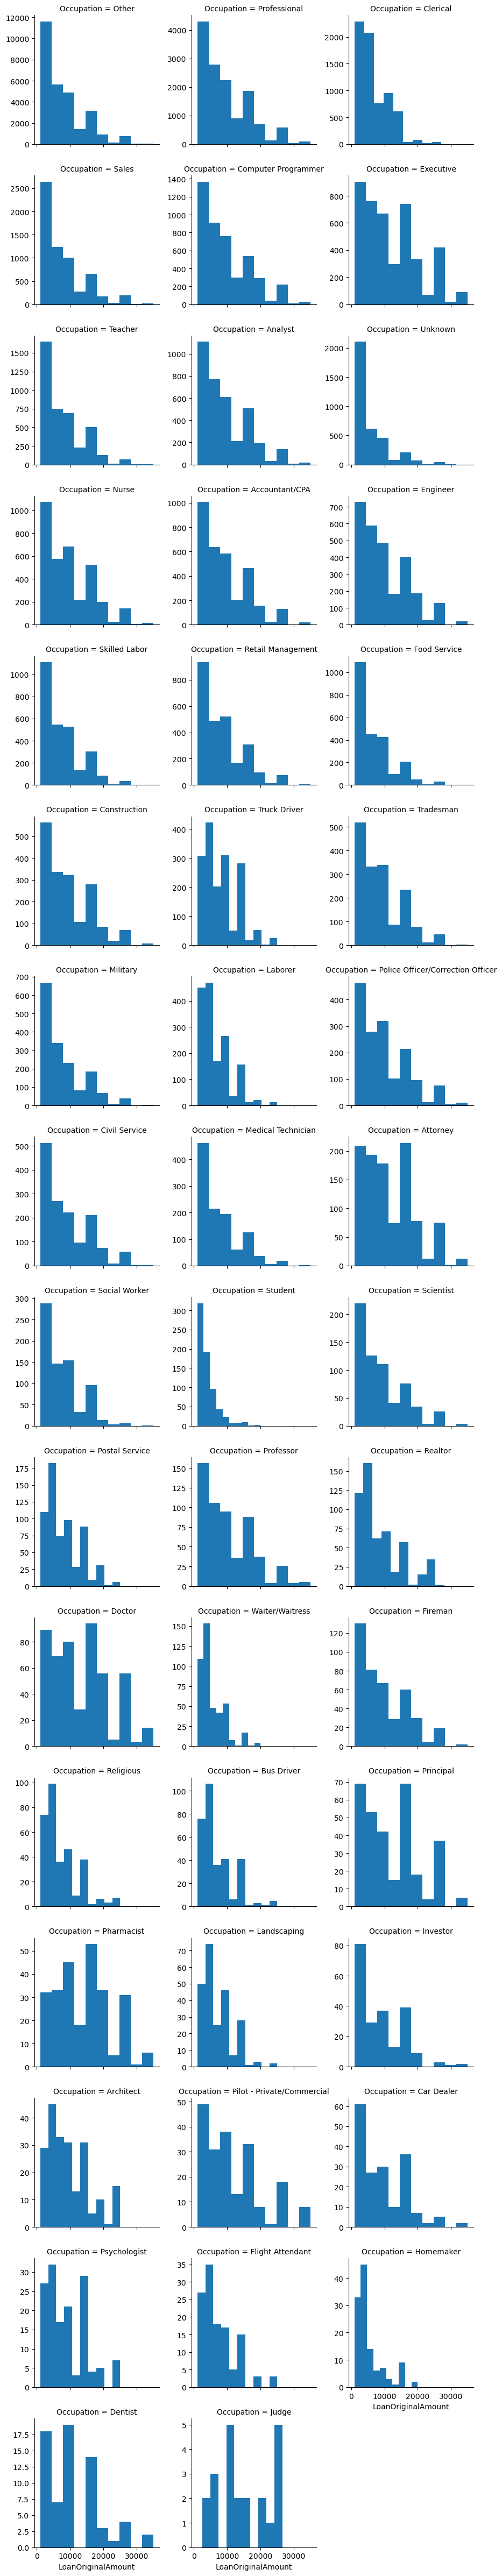

In [48]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = prosper_df, col = 'Occupation', col_wrap=3, sharey=False)
g.map(plt.hist, "LoanOriginalAmount");

#### Borrower Interest Rate Vs. Loan Status

> Let's explore the relationship between Loan Status and Borrower Interest Rate

In [54]:
prosper_df['LoanStatusOrdered'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113937 entries, 0 to 113936
Series name: LoanStatusOrdered
Non-Null Count   Dtype   
--------------   -----   
101945 non-null  category
dtypes: category(1)
memory usage: 111.8 KB


In [55]:
prosper_df['LoanStatusOrdered'].describe()

count      101945
unique         11
top       Current
freq        56576
Name: LoanStatusOrdered, dtype: object

In [56]:
prosper_df['LoanStatusOrdered'].value_counts()

Current                   56576
Completed                 38074
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatusOrdered, dtype: int64

In [57]:
prosper_df['BorrowerRate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113937 entries, 0 to 113936
Series name: BorrowerRate
Non-Null Count   Dtype  
--------------   -----  
113937 non-null  float64
dtypes: float64(1)
memory usage: 890.3 KB


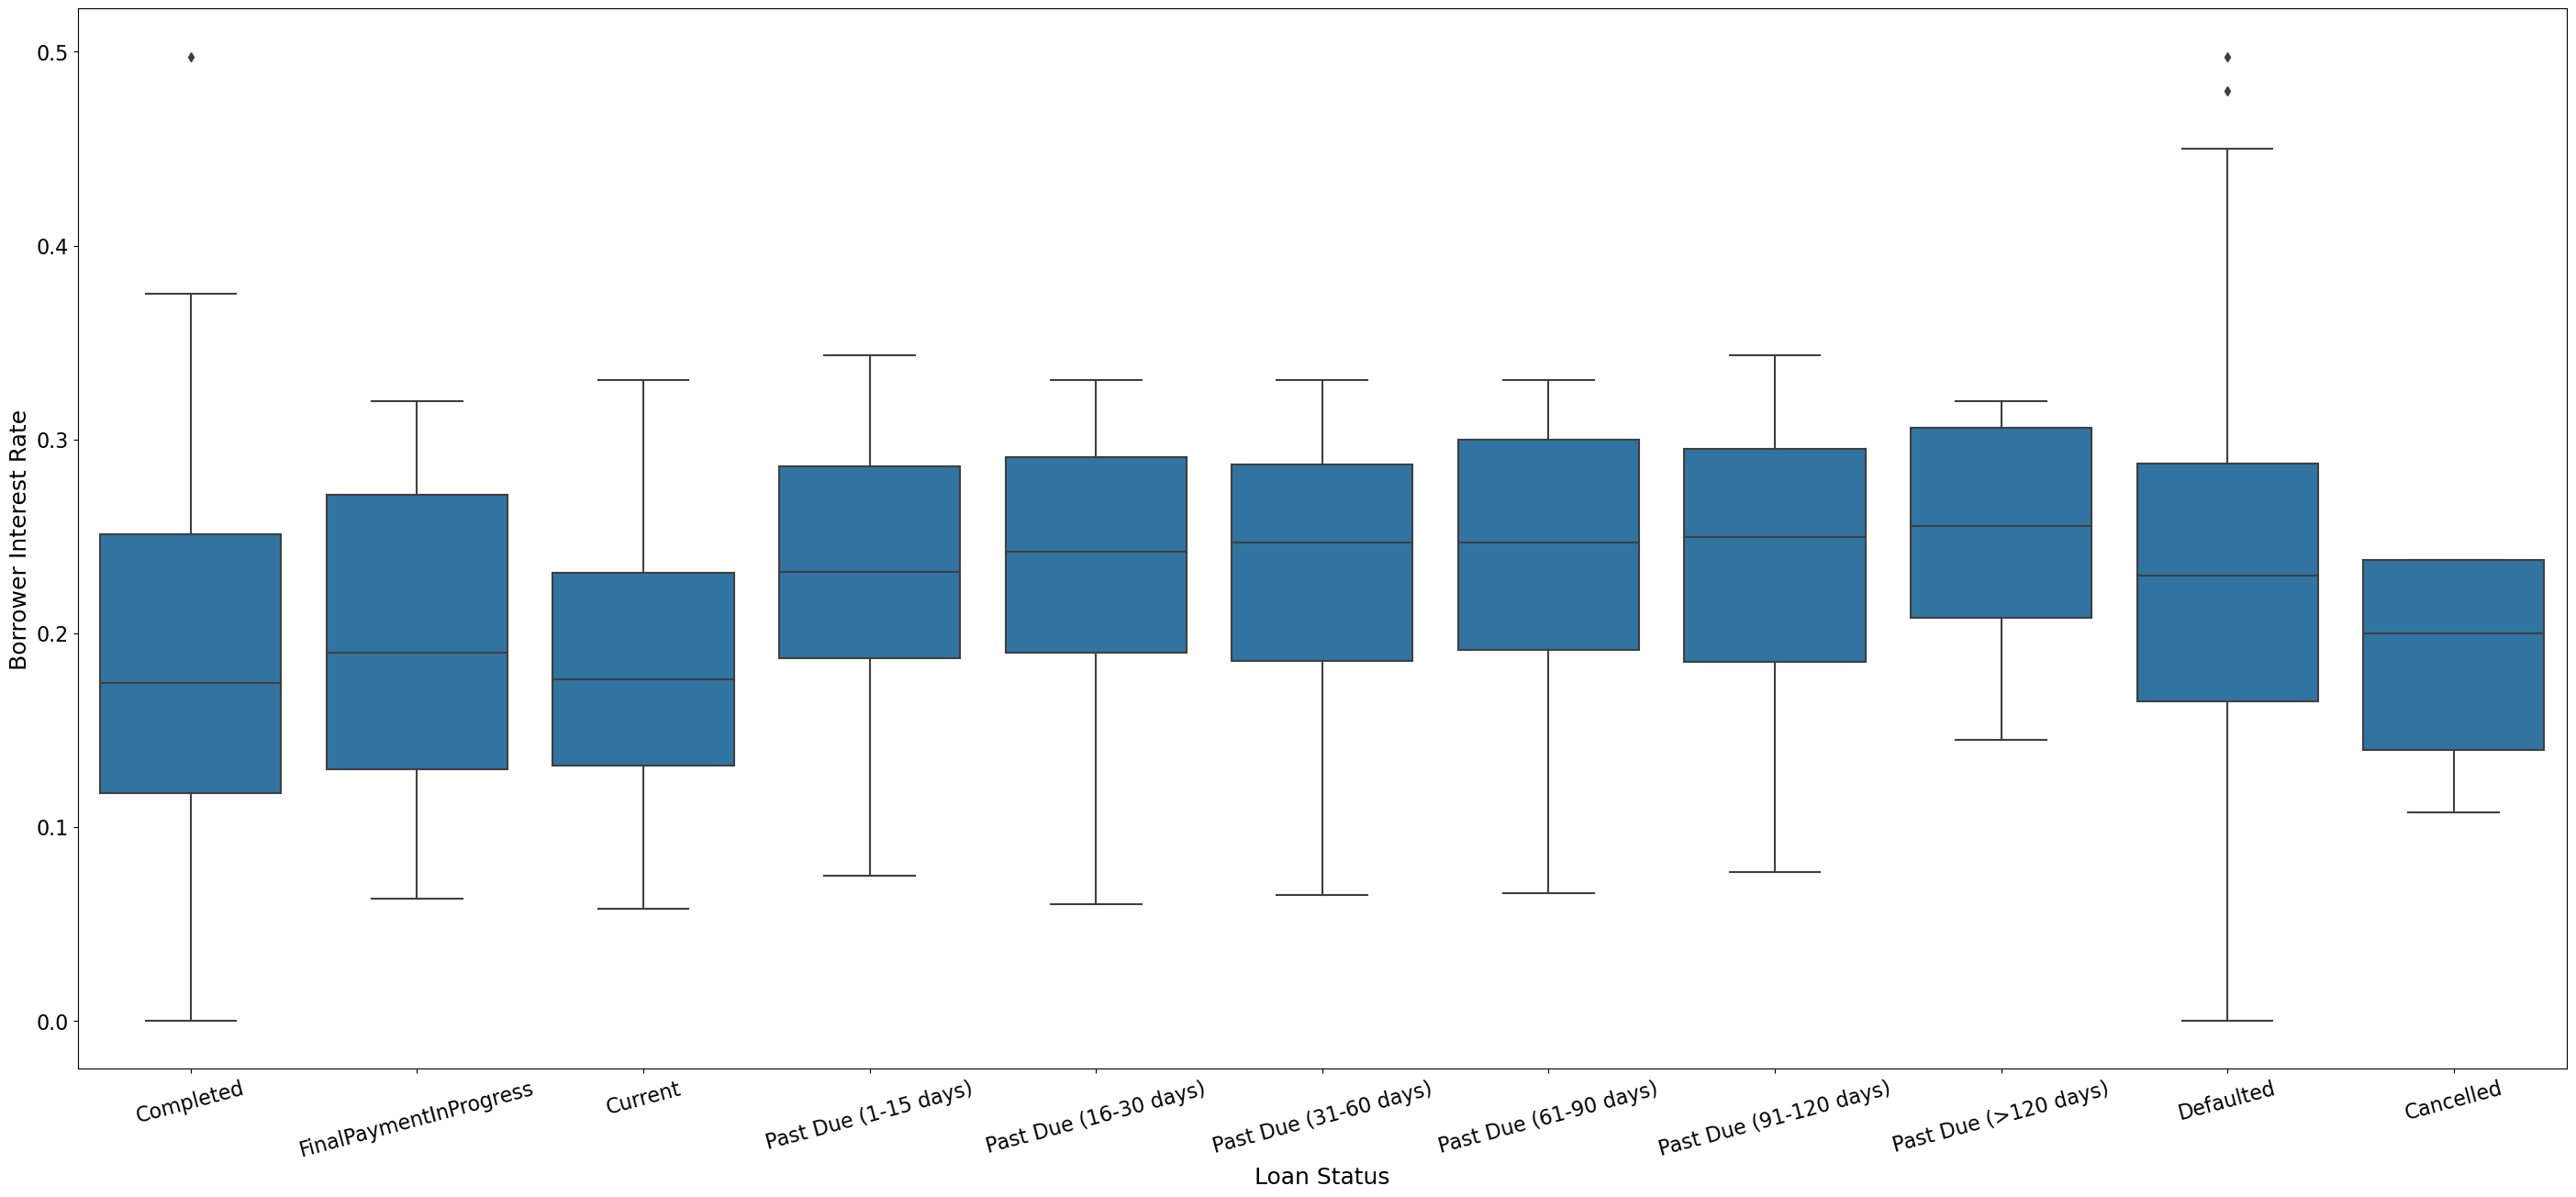

In [58]:
sb.boxplot(data=prosper_df, x='LoanStatusOrdered', y='BorrowerRate', color=sb.color_palette()[0])
plt.xticks(rotation=15);

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

plt.xlabel('Loan Status', fontsize=18)
plt.ylabel('Borrower Interest Rate', fontsize=18);

from matplotlib import rcParams
rcParams['figure.figsize'] = 40,20

> It can be observed that the lower the interest rate, the more likely the loan is current, completed or have it's final payment in progress

#### Loan Status and Employment Status

> Let's explore the relationship between Employment Status and Loan Status

In [59]:
# Null values will be filled with 'Unknown'

prosper_df['EmploymentStatus'].fillna('Unknown').value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Unknown           2255
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

> In order to apply clustered bar chart to show the relationship between loan status and employment status, we will group EmploymentStatus entries into 2 broad categories of 'Employed' and 'Not employed'. 'Not available', 'Unknown' and 'Other' will all be categorised under as 'Not employed' based on the presumption that financial institutions will typically obfuscate employment status when it is not favourable for presentation to investors

In [60]:
replacers = {'Full-time':'Employed','Self-employed':'Employed','Part-time':'Employed','Not available':'Not employed', 'Other':'Not employed', 'Retired':'Not employed', 'Unknown':'Not employed'} 
prosper_df['EmploymentStatus'] = prosper_df['EmploymentStatus'].replace(replacers)
prosper_df['EmploymentStatus'].value_counts()

Employed        100899
Not employed     10783
Name: EmploymentStatus, dtype: int64

In [61]:
loanstatus_types = prosper_df['LoanStatusOrdered'].value_counts().index
loanstatus_class = pd.api.types.CategoricalDtype(ordered=True, categories=loanstatus_types)
prosper_df['LoanStatusOrdered'] = prosper_df['LoanStatusOrdered'].astype(loanstatus_class);

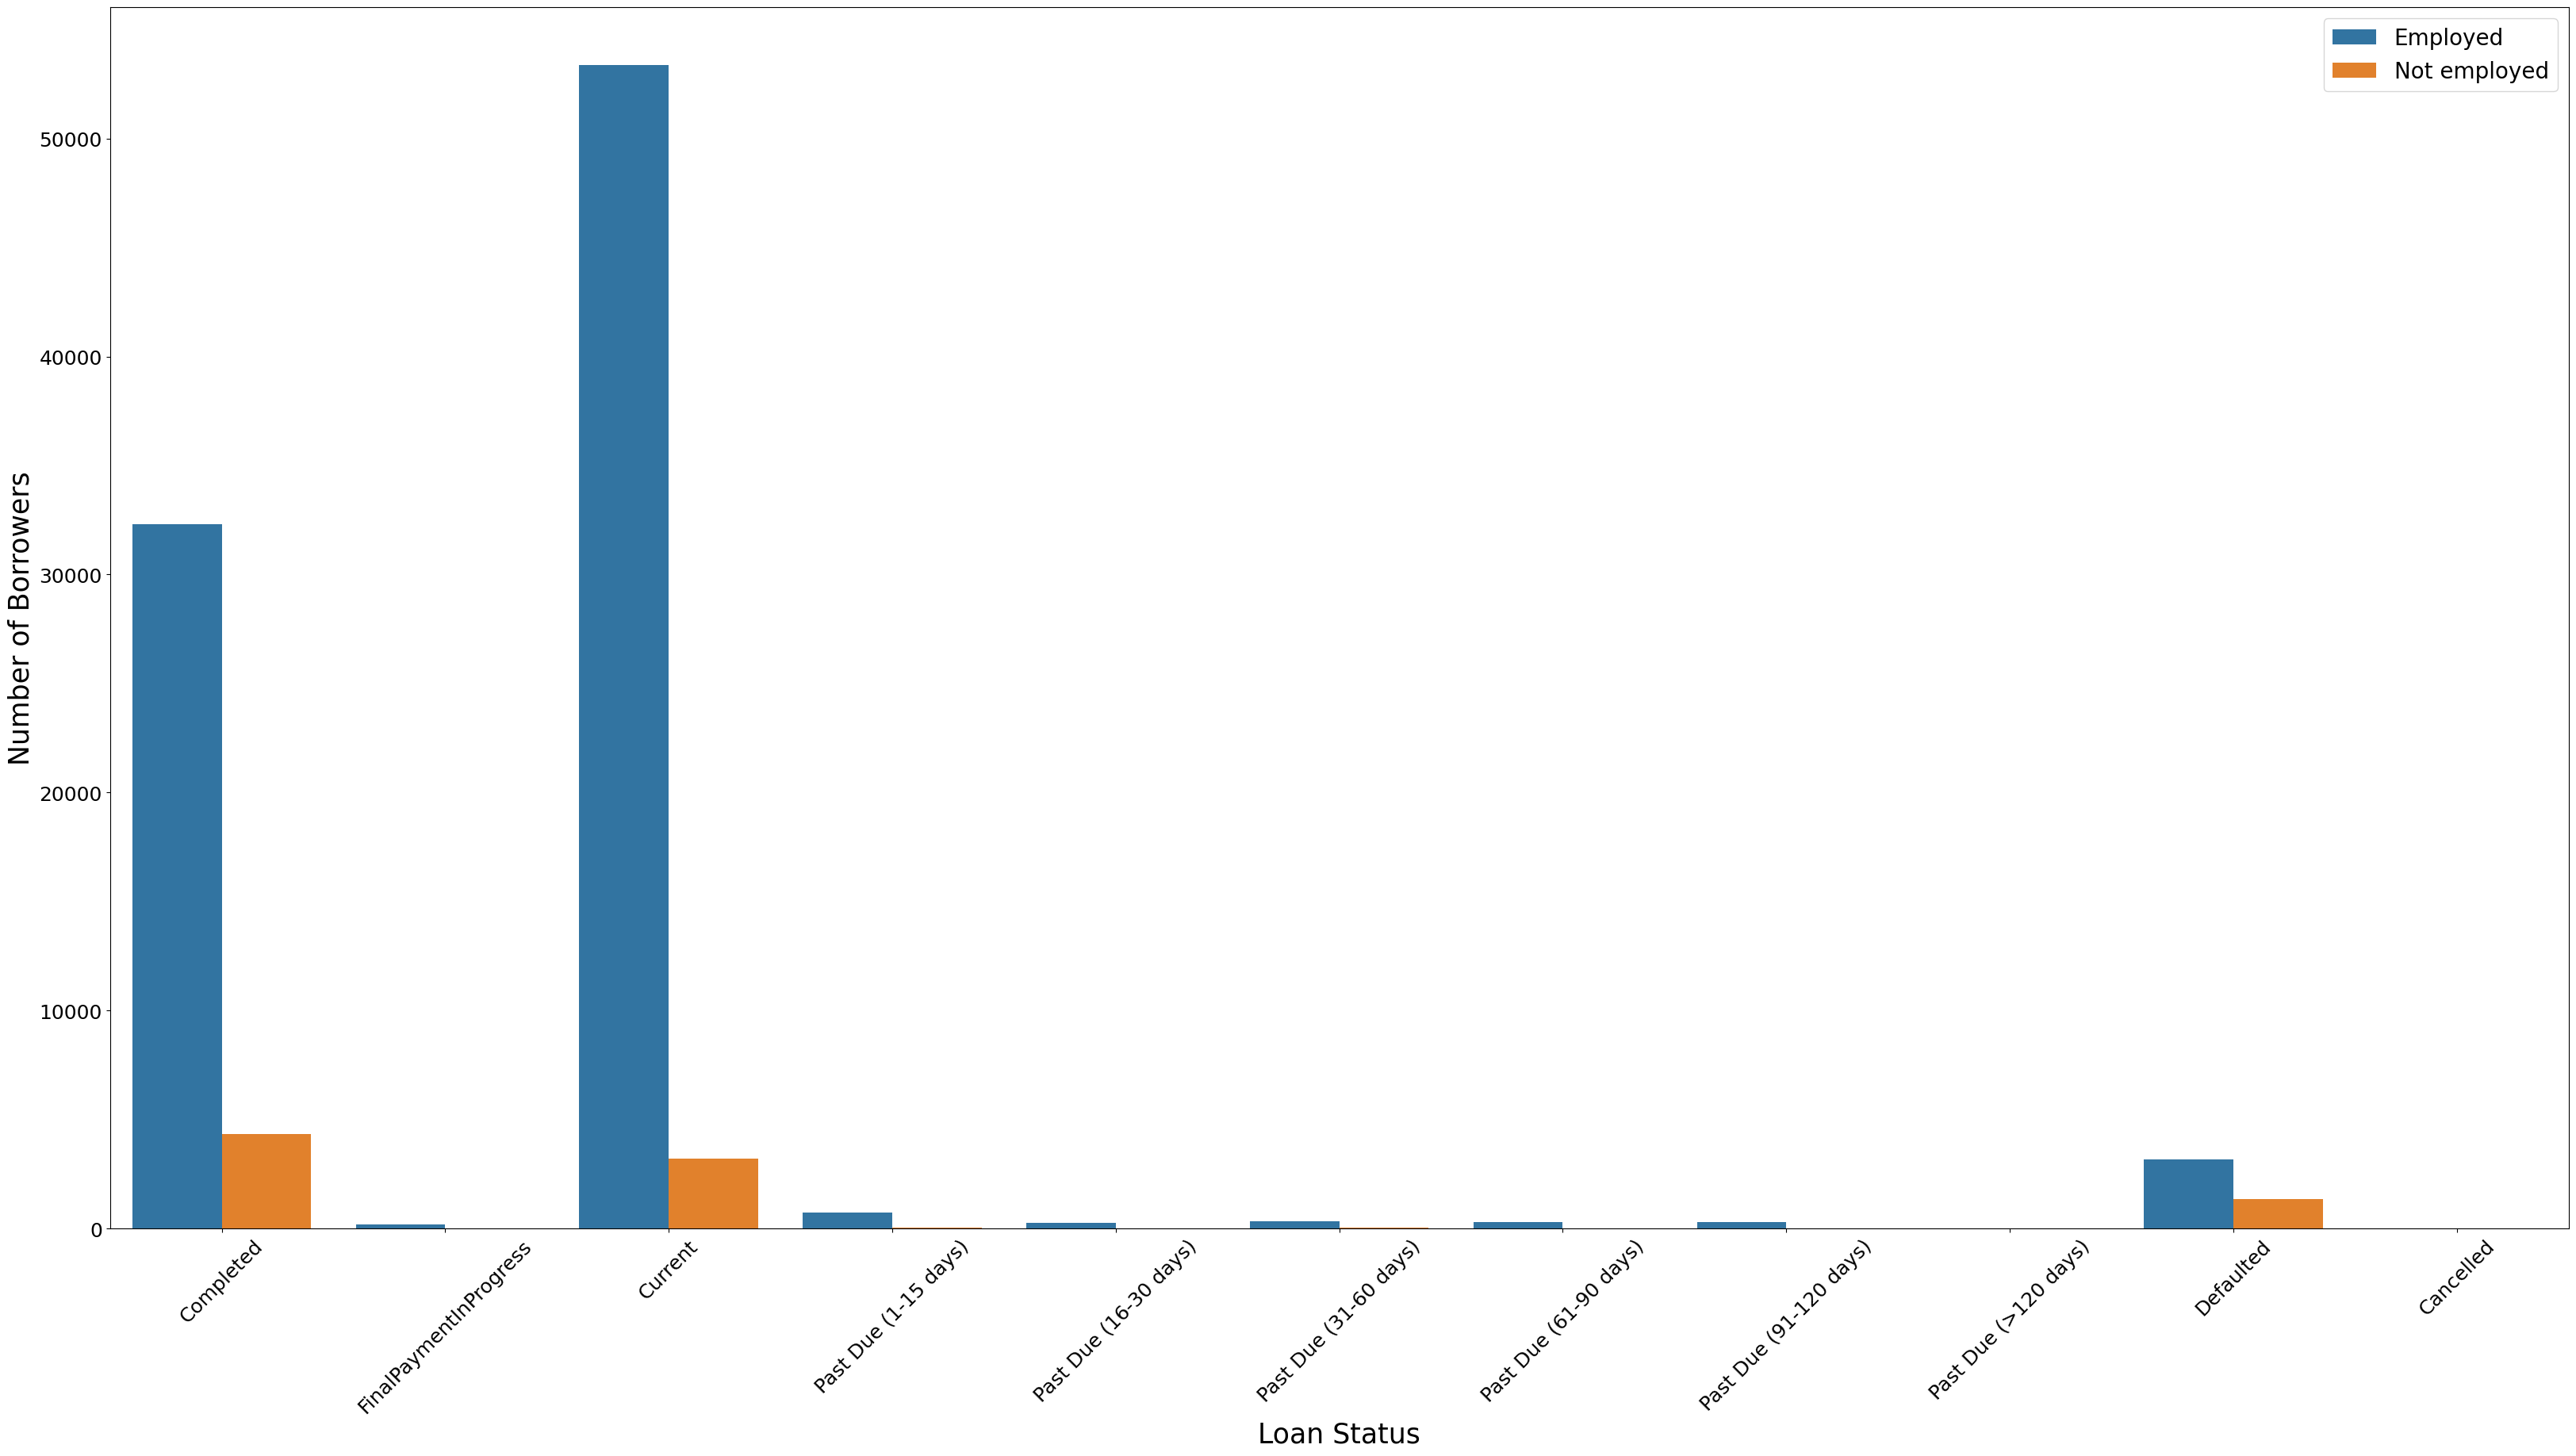

In [62]:
sb.countplot(data = prosper_df, x = 'LoanStatusOrdered', hue = 'EmploymentStatus');
plt.xticks(fontsize=18, rotation = 45);
plt.yticks(fontsize=18);
plt.xlabel('Loan Status', fontsize=25)
plt.ylabel('Number of Borrowers', fontsize=25)
plt.legend(fontsize=20)
from matplotlib import rcParams
rcParams['figure.figsize'] = 45,20

> Despite our assumptions, it can still be observed that unemployed borrowers were more or less proportionally defaulting in their loans compared to employed borrowers. However, the unemployed had less current loans and a proportionally higher defaulted loan status.

In [63]:
# Further analysis with heat maps
ct_counts = prosper_df.groupby(['LoanStatusOrdered', 'EmploymentStatus']).size()
ct_counts

LoanStatusOrdered       EmploymentStatus
Completed               Employed            32306
                        Not employed         4329
FinalPaymentInProgress  Employed              197
                        Not employed            8
Current                 Employed            53354
                        Not employed         3222
Past Due (1-15 days)    Employed              749
                        Not employed           57
Past Due (16-30 days)   Employed              247
                        Not employed           18
Past Due (31-60 days)   Employed              330
                        Not employed           33
Past Due (61-90 days)   Employed              293
                        Not employed           20
Past Due (91-120 days)  Employed              282
                        Not employed           22
Past Due (>120 days)    Employed               16
                        Not employed            0
Defaulted               Employed             3153
         

In [64]:
ct_counts1 = ct_counts.reset_index(name='count')
ct_counts1

,LoanStatusOrdered,EmploymentStatus,count
0,Completed,Employed,32306
1,Completed,Not employed,4329
2,FinalPaymentInProgress,Employed,197
3,FinalPaymentInProgress,Not employed,8
4,Current,Employed,53354
5,Current,Not employed,3222
6,Past Due (1-15 days),Employed,749
7,Past Due (1-15 days),Not employed,57
8,Past Due (16-30 days),Employed,247
9,Past Due (16-30 days),Not employed,18


In [65]:
ct_counts1 = ct_counts1.pivot(index = 'LoanStatusOrdered', columns = 'EmploymentStatus', values = 'count')
ct_counts1

EmploymentStatus,Employed,Not employed
LoanStatusOrdered,,
Completed,32306,4329
FinalPaymentInProgress,197,8
Current,53354,3222
Past Due (1-15 days),749,57
Past Due (16-30 days),247,18
Past Due (31-60 days),330,33
Past Due (61-90 days),293,20
Past Due (91-120 days),282,22
Past Due (>120 days),16,0


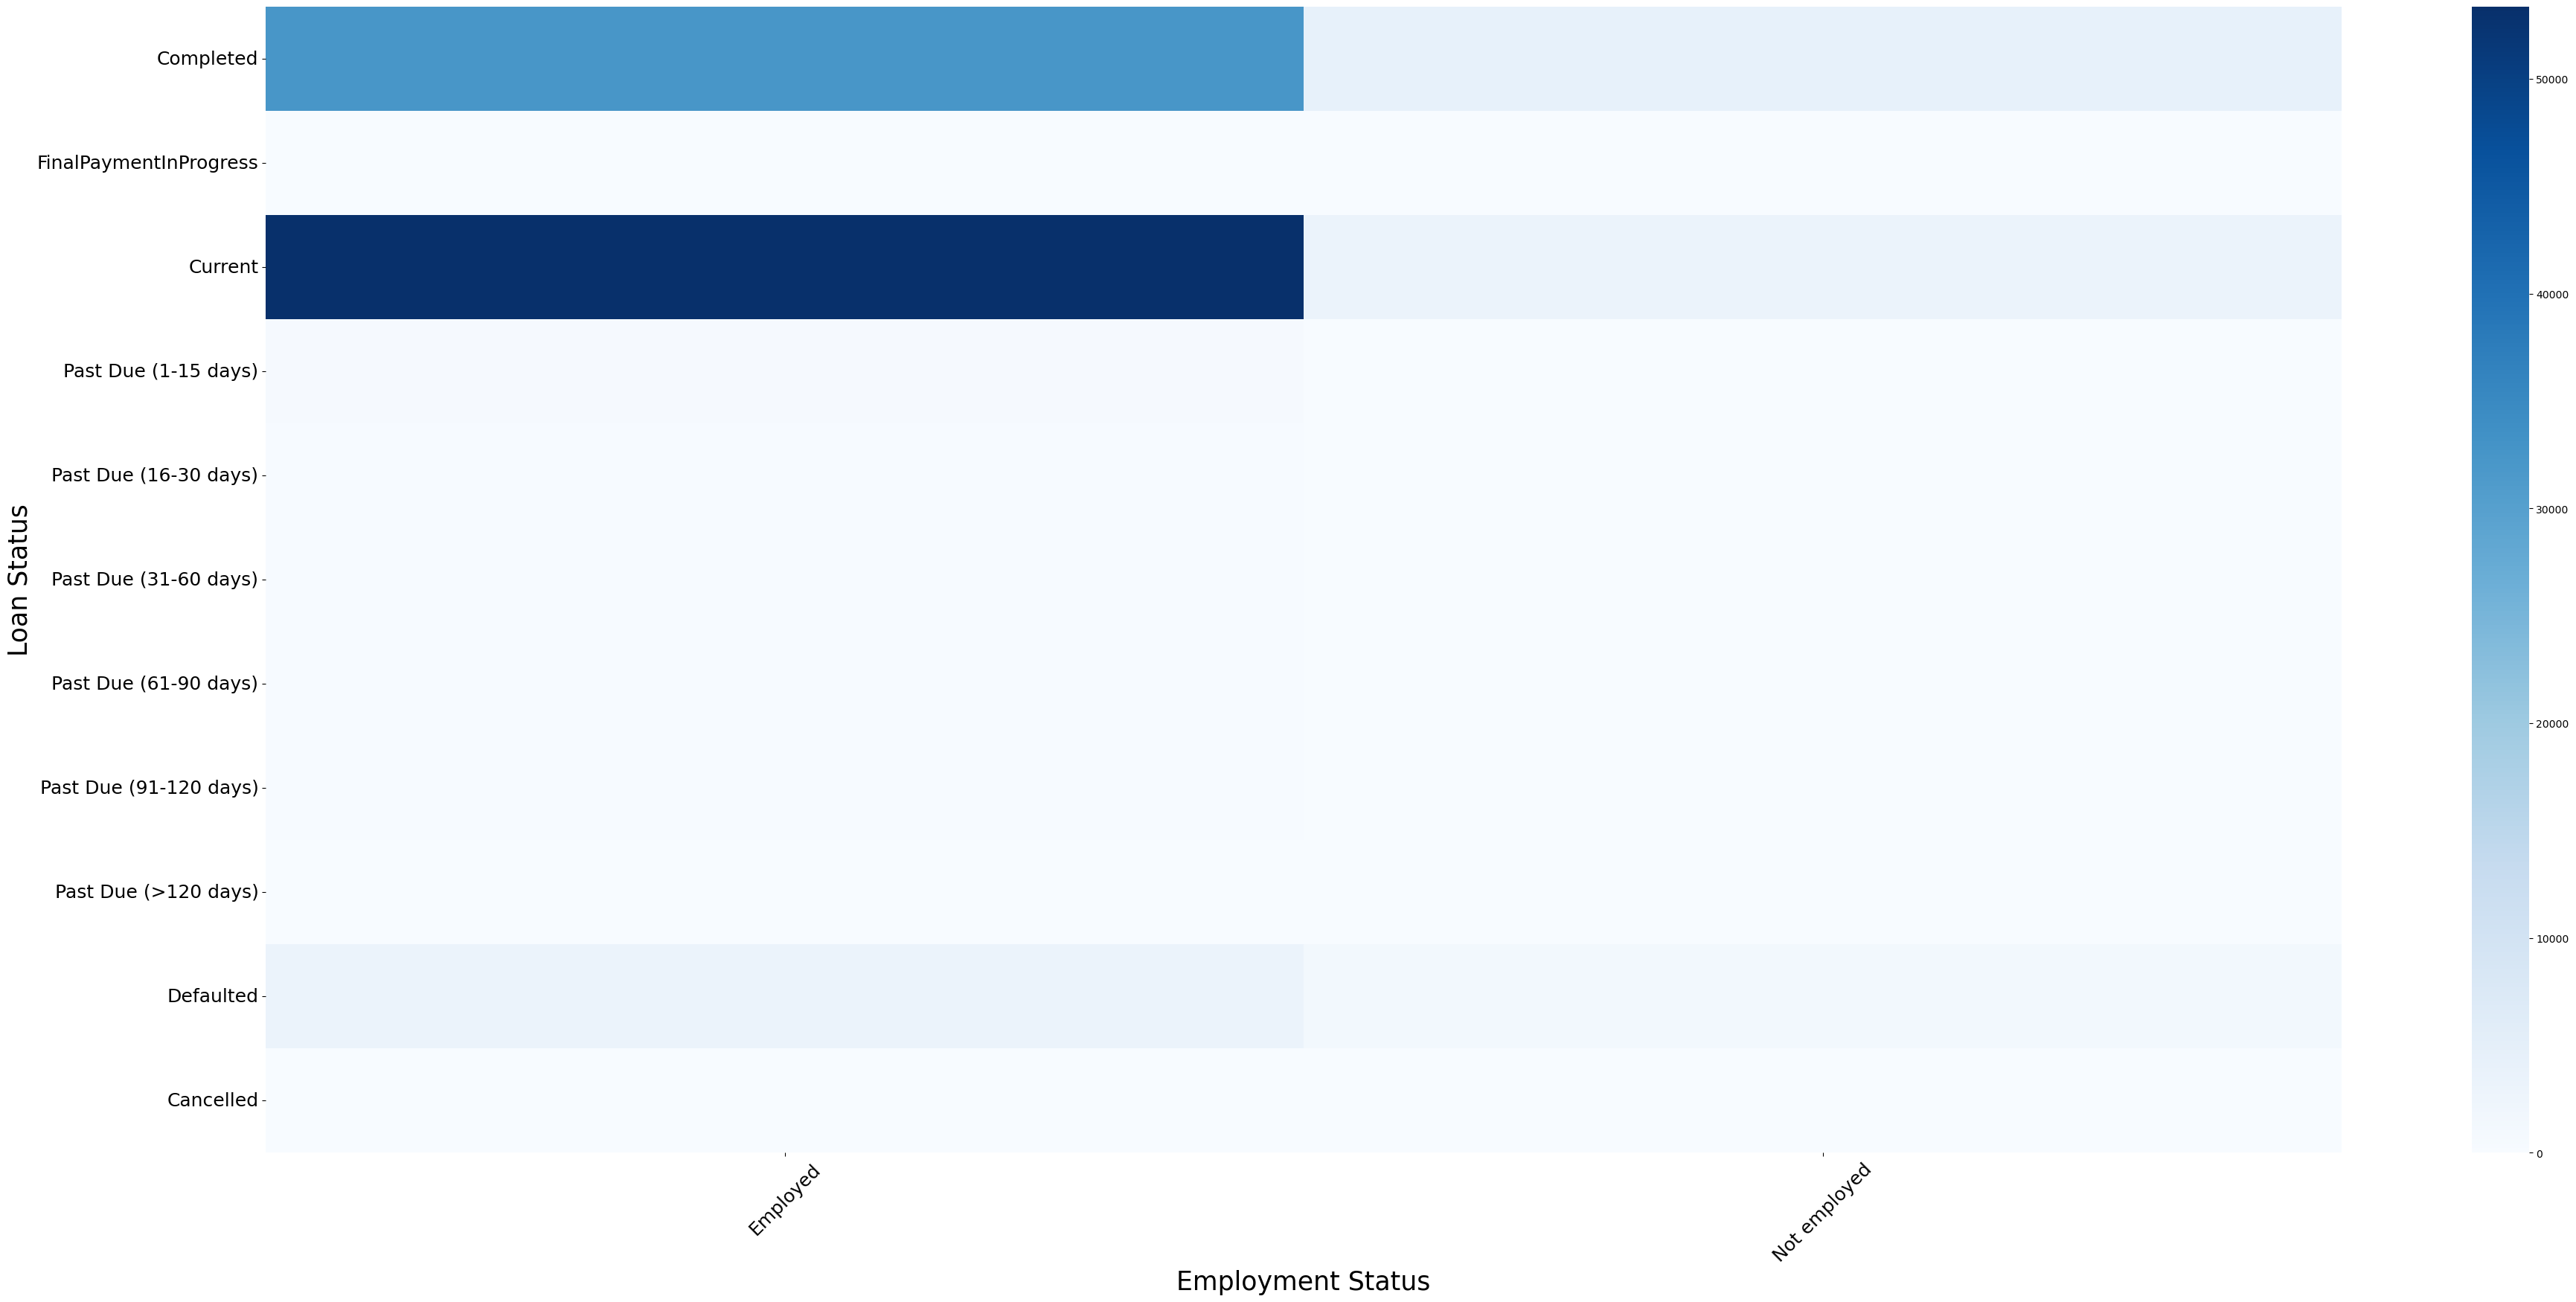

In [66]:
sb.heatmap(ct_counts1, cmap='Blues');
plt.xticks(fontsize=18, rotation = 45);
plt.yticks(fontsize=18);
plt.xlabel('Employment Status', fontsize=25)
plt.ylabel('Loan Status', fontsize=25);
rcParams['figure.figsize'] = 55, 20

#### Loan Status and Original Loan Amount

> A depiction of loan status against loan original amount shown more clearly through facetting

In [67]:
loanstatus_types = prosper_df['LoanStatusOrdered'].value_counts().index
loanstatus_class = pd.api.types.CategoricalDtype(ordered=True, categories=loanstatus_types)
prosper_df['LoanStatusOrdered'] = prosper_df['LoanStatusOrdered'].astype(loanstatus_class);

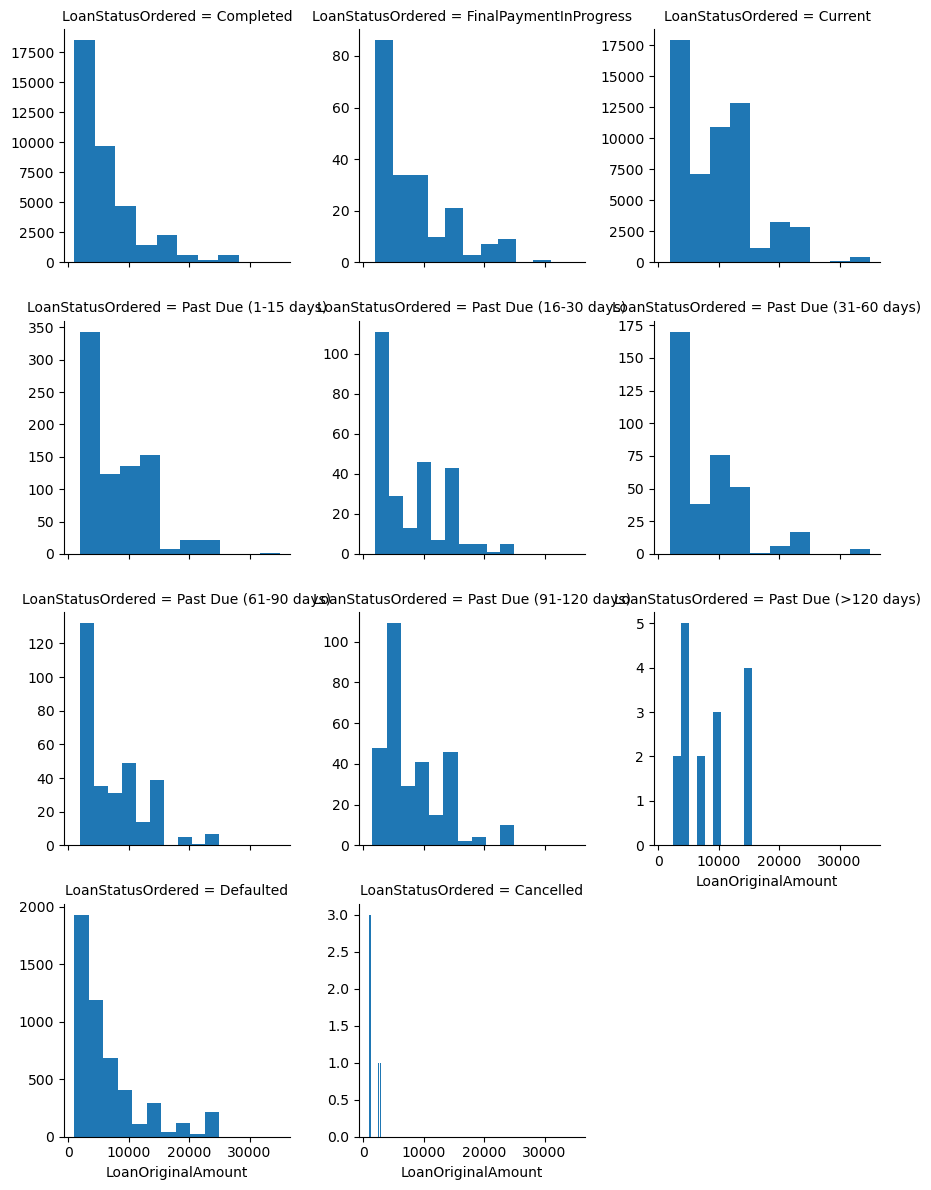

In [68]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = prosper_df, col = 'LoanStatusOrdered', col_wrap=3, sharey=False)
g.map(plt.hist, "LoanOriginalAmount");


> Facetting shows more clearly that most loans, irrespective of amount, are current or completed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> From the chart of original loan amount vs occupation, it is seen that a bulk of most occupations took loans below 10,000 dollars. However, more highly skilled occupations like doctors, pharmacists, engineers, pilots, attorneys, dentists and judges had a more evenly spread loan amount distribution.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> Yes. Despite the assumptions taken, it can still be observed that unemployed borrowers were more or less proportionally defaulting in their loans compared to employed borrowers. However, the unemployed had less current loans and a proportionally higher defaulted loan status.

## Multivariate Exploration



#### Loan Status, Original Loan Amount and Borrower Rate

> Let's graduate from exploring the relationship between loan status and original loan amount to including borrower rate in the mix

In [69]:
np.random.seed(2022)
sample = np.random.choice(prosper_df.shape[0], 200, replace = False)
prosper_df_subset = prosper_df.loc[sample]

In [70]:
prosper_df['LoanStatusOrdered'].value_counts().index

CategoricalIndex(['Current', 'Completed', 'Defaulted', 'Past Due (1-15 days)',
                  'Past Due (31-60 days)', 'Past Due (61-90 days)',
                  'Past Due (91-120 days)', 'Past Due (16-30 days)',
                  'FinalPaymentInProgress', 'Past Due (>120 days)',
                  'Cancelled'],
                 categories=['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', ...], ordered=True, dtype='category')

In [71]:
replacers = {'Past Due (1-15 days)':'Past Due','Past Due (31-60 days)':'Past Due','Past Due (61-90 days)'\
             :'Past Due','Past Due (91-120 days)':'Past Due', 'Past Due (16-30 days)'\
             :'Past Due', 'Past Due (>120 days)':'Past Due', 'FinalPaymentInProgress':'Current','Chargedoff'\
             :'Defaulted'} 
prosper_df['LoanStatusOrdered'] = prosper_df['LoanStatusOrdered'].replace(replacers)
prosper_df['LoanStatusOrdered'].value_counts().index

CategoricalIndex(['Current', 'Completed', 'Defaulted', 'Past Due',
                  'Cancelled'],
                 categories=['Completed', 'Current', 'Past Due', 'Defaulted', 'Cancelled'], ordered=True, dtype='category')

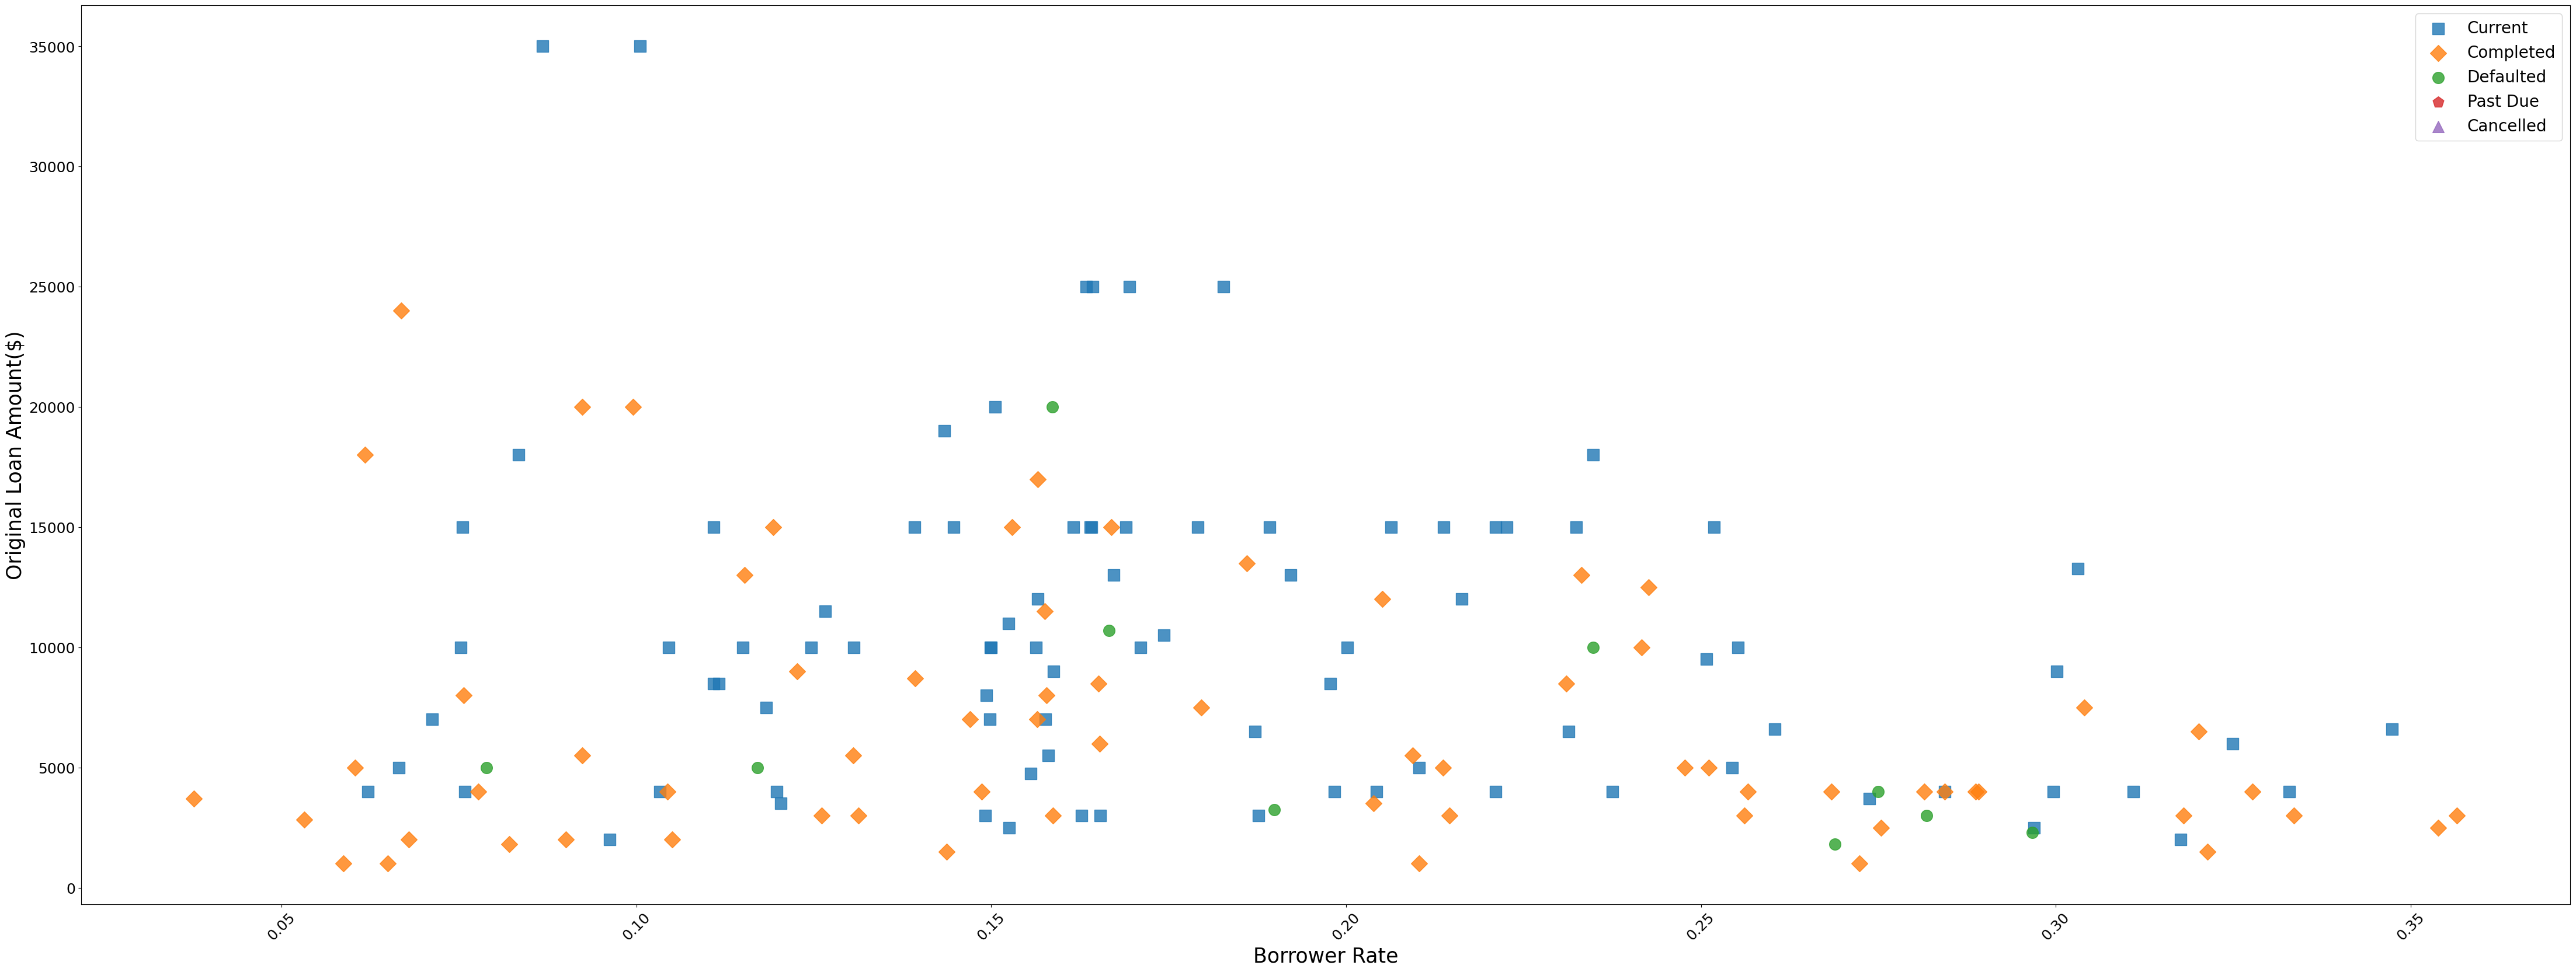

In [72]:
ttype_markers = [['Current', 's'],
                 ['Completed', 'D'],
                 ['Defaulted', 'o'],
                  ['Past Due','p'],
                  ['Cancelled','^'] ]
for pyt, marker in ttype_markers:
    plot_data = prosper_df_subset.loc[prosper_df_subset['LoanStatusOrdered'] == pyt]
    sb.regplot(data = plot_data,  x = 'BorrowerRate', y = 'LoanOriginalAmount',
               x_jitter = 0.04, fit_reg = False, marker = marker, scatter_kws={'s':200});
    
plt.ylabel('Original Loan Amount($)', fontsize=25)
plt.xlabel('Borrower Rate', fontsize=25);
plt.legend(['Current', 'Completed', 'Defaulted', 'Past Due', 'Cancelled'], fontsize=20);

plt.xticks(fontsize=18, rotation = 45);
plt.yticks(fontsize=18);

rcParams['figure.figsize'] = 45,20

> It is interesting to see the interaction of the three variables: as mentioned in the bivariate plot, current and completed loans tend to be with lower interest rates between 0.1 and 0.2. Also, the higher the interest rate, the lower the amount borrowed.

#### Original Loan Amount, Monthly Income and Borrower Rate

> We have seen the relationship between original loan amount and monthly income. Let's explore the relationships with including borrower rate.

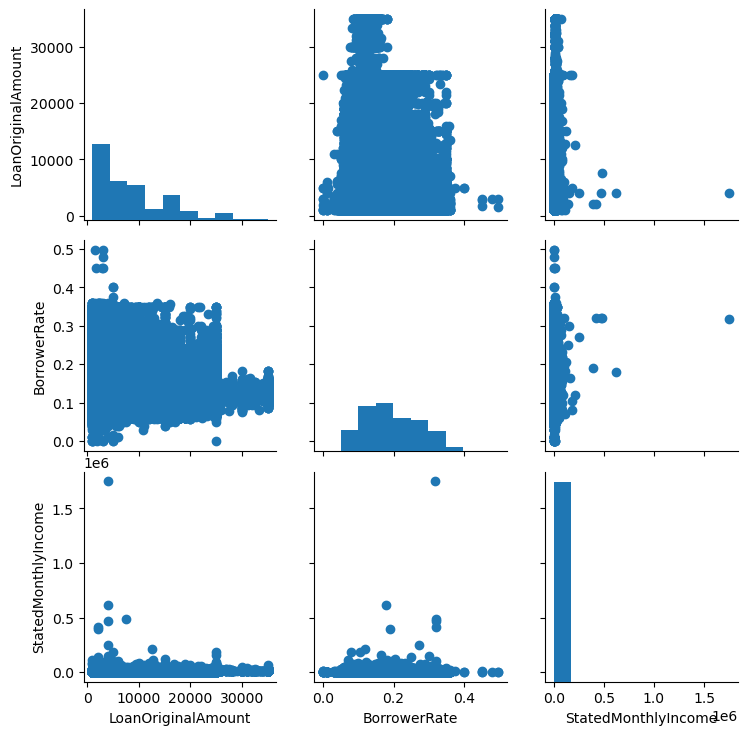

In [73]:
bins = 10 ** np.arange(1, 5+0.1, 0.1)
g = sb.PairGrid(data = prosper_df, vars = ['LoanOriginalAmount', 'BorrowerRate', 'StatedMonthlyIncome'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

plt.ylabel('Original Loan Amount($)', fontsize=25)
plt.xlabel('Borrower Rate', fontsize=25);

plt.xticks(fontsize=18, rotation = 45);
plt.yticks(fontsize=18);

rcParams['figure.figsize'] = 45,20

> The diagonal plot shows a clear comparison of variables. Notice should be put on the exponents

#### Employment Status, Original Loan Amount and Loan Status

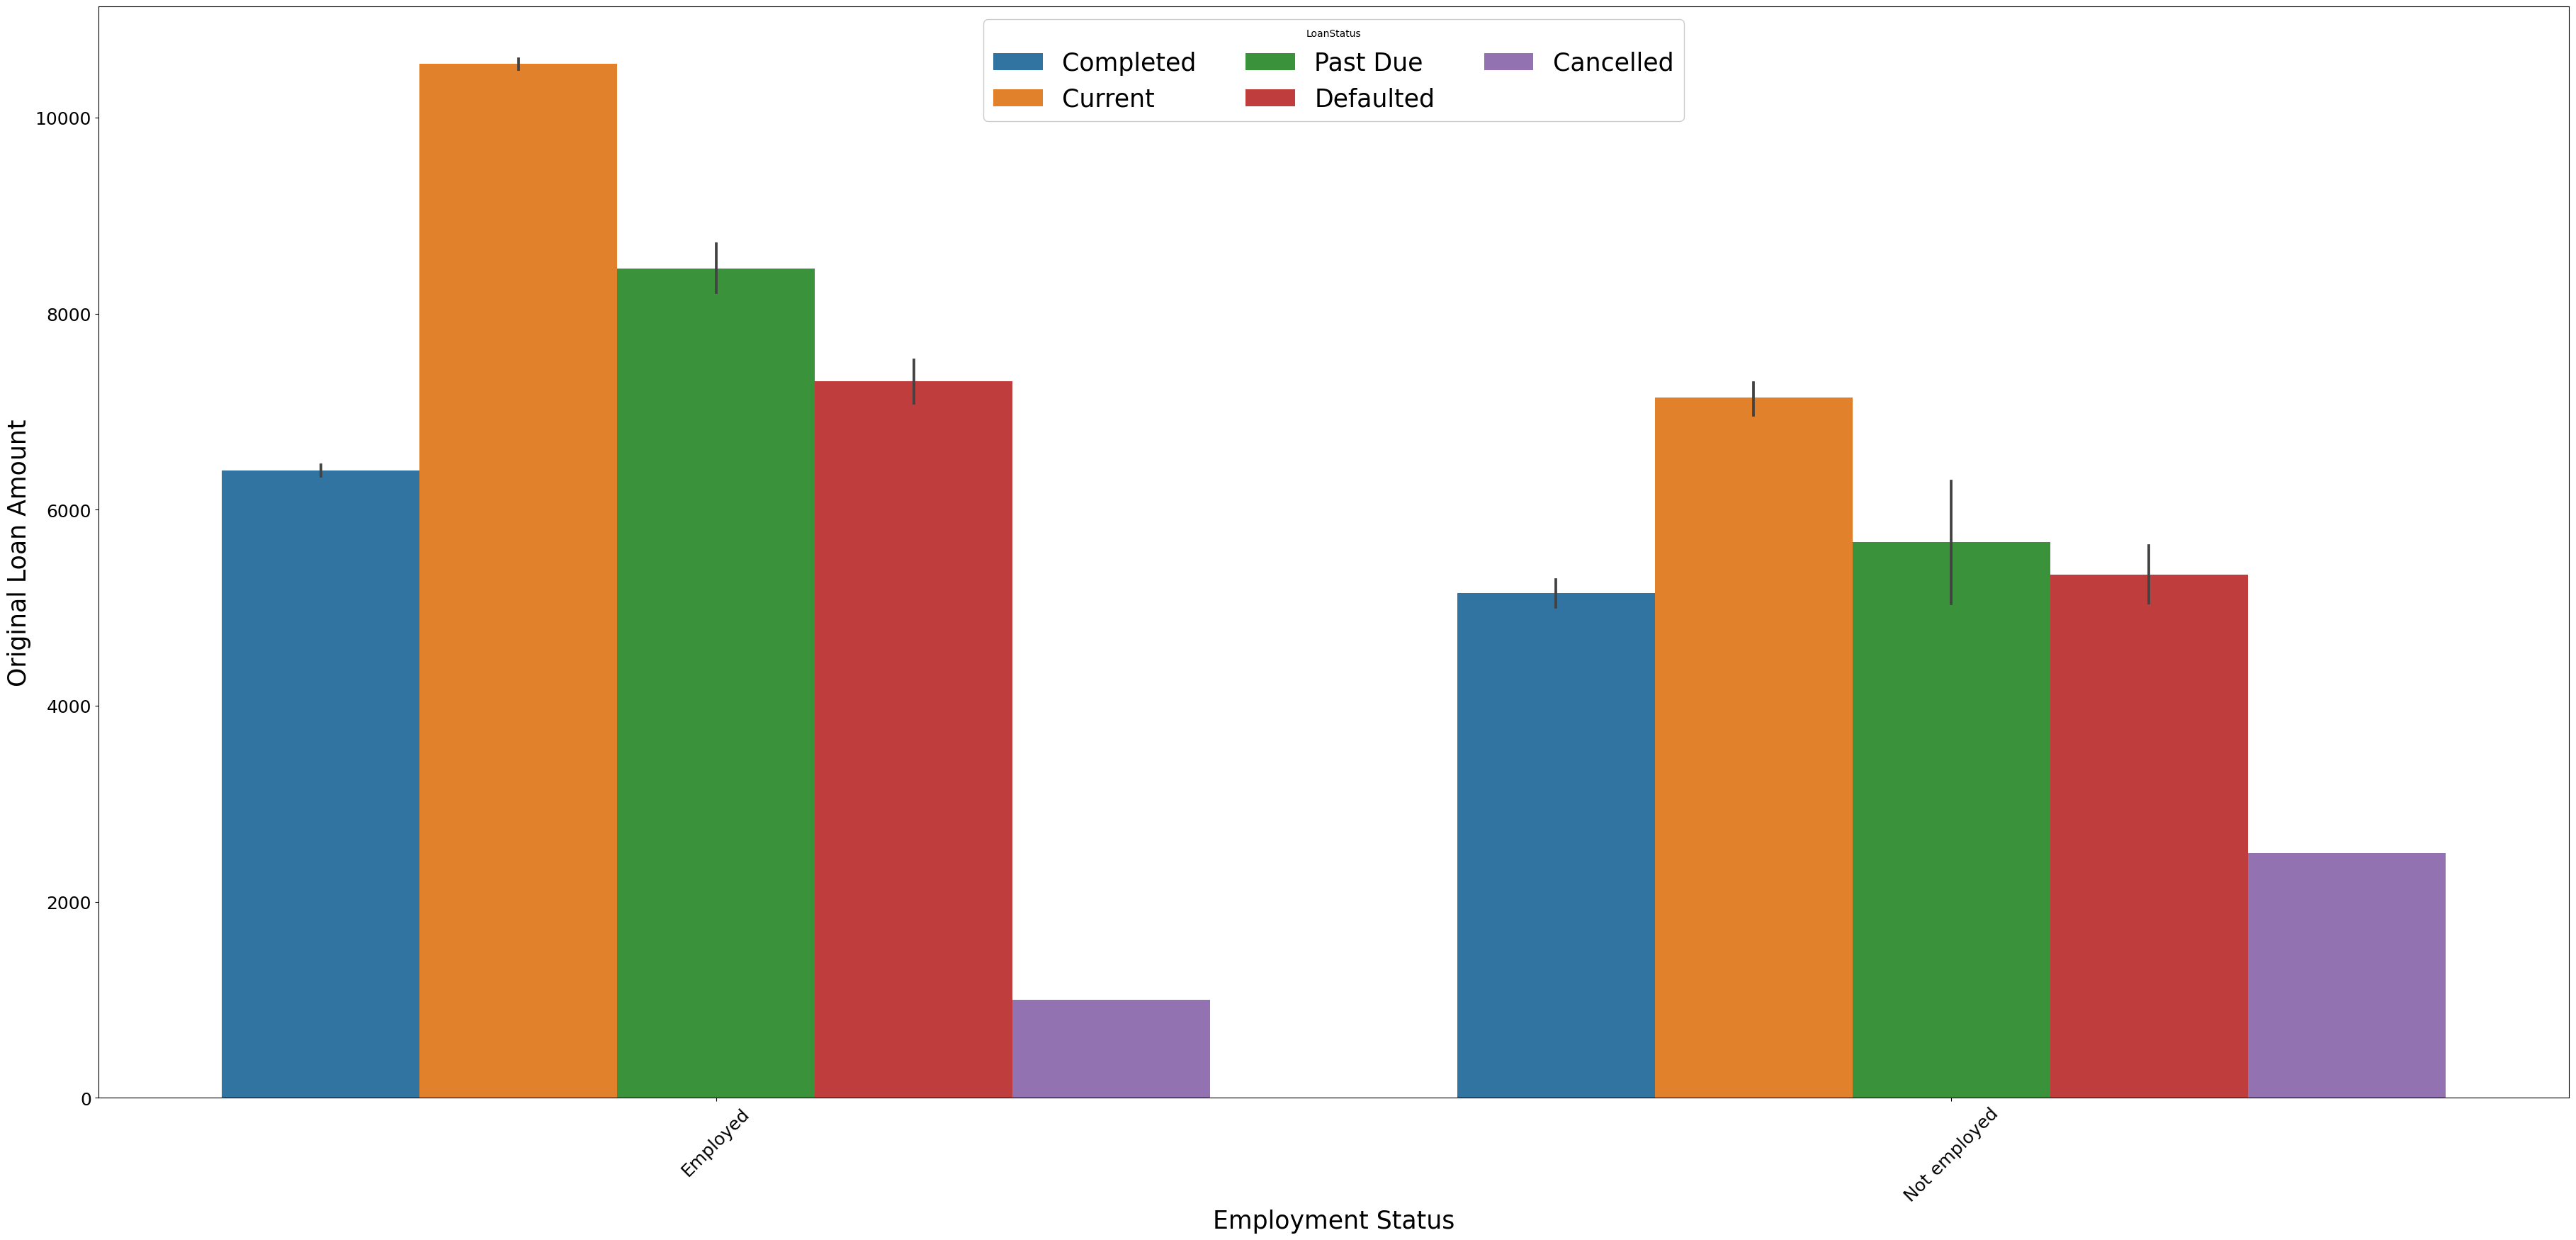

In [74]:
ax = sb.barplot(data = prosper_df, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'LoanStatusOrdered')
ax.legend(loc = 9, ncol = 3, framealpha = 1, title = 'LoanStatus', fontsize=25);

plt.ylabel('Original Loan Amount', fontsize=25)
plt.xlabel('Employment Status', fontsize=25);


plt.xticks(fontsize=18, rotation = 45);
plt.yticks(fontsize=18);

rcParams['figure.figsize'] = 45,20

> These clustered plots show a clear relationship between original loan amount and loan status and is divided clearly by employment status. The confidence intervals are also present as a measure of accuracy.

#### Original Loan Amount, Borrower Rate and Employment Status

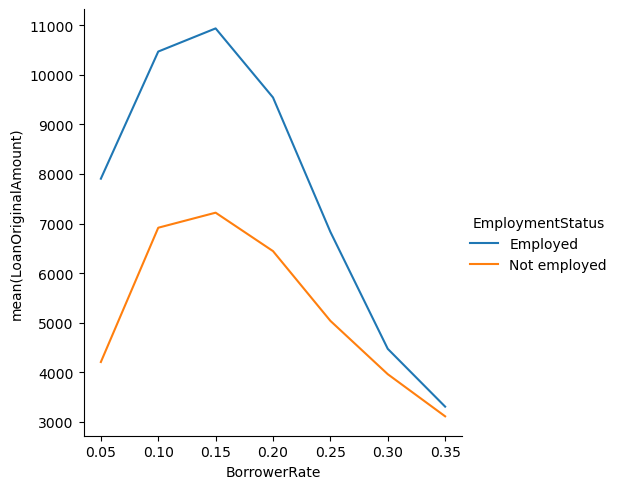

In [75]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.025, prosper_df['BorrowerRate'].max()+0.05, 0.05)
g = sb.FacetGrid(data = prosper_df, hue = 'EmploymentStatus', height = 5)
g.map(mean_poly, 'BorrowerRate', 'LoanOriginalAmount', bins = bin_edges)
g.set_ylabels('mean(LoanOriginalAmount)')
g.add_legend();

> The line plot shows clearly that employed borrowers take a higher amount on average. It also shows that as the interest rate increases, mean amount peaks at about 0.175 (for both employed and unemployed borrowers); and continues to decline as the interest rate increses.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationships among loan amount, loan status, interest rate, employment status and stated monthly income were all shown using multivariate plots. The interdepency was shown among the variables, where directly, inversely or even more complicated relationships. The relationships matured from bivariate and these relationships still stood and became more robust with the multivariate plots.

### Were there any interesting or surprising interactions between features?

> A surprising feature was with regards the loan status variable and how low the defaulted and past due loans were in relation to high interest rate and unemployed borrowers. It confirms that the lending institution is astute and alert in the loans it avails to borrowers (employed or unemployed) and should be therefore profitable.

## Conclusions
> We can surmise that Prosper LLC is a profitable establishment. It has a very low bad loan porfolio irrespective of lending to unemployed borrowers. This shows a thorough investigation of its borrowers with an end to verifying repayent sources.

> My investigation into the company's data started with eploring the occupation of borrowers to going to the loan status, employment status, and to also investigate the impact of interest rate. Monthly income usually also determines loan amount and this was look into as well. 

> Bivariate relationships among these variables and more were explored. Some of the data had to be wrangled for more clarity and charts were plotted showing very interesting relationships as stated in each case. Multivariate relationships were also explore which showed more robust relationship among variables. For instance, employment status usually determines loan amount with the employed often taking higher amounts, where as, it does not necessarily determine loan status, ie, if a loan will go bad. This will encourage the institution to perhaps give more loans to the unemployed who intend to start businesses, albeit carefully monitored. 

> The comnpany should also be careful with interest rates as they lead to more loans going bad, as well as a reducing loan amount borrowed. This could affect the bottom line in the long run.

> Prosper LLC is in a good position with regards its loan business with a healthy current to defaulted loan ratio and has a bright future ahead with good management.
